# **Analyzing Video Game Sales 🎮**

### Fall 2025 Data Science Project

#### *Dia Nawathe, Archita Naik, Monu Sunkara, Henry Gardiner, and Dwarakesh Baraneethan*

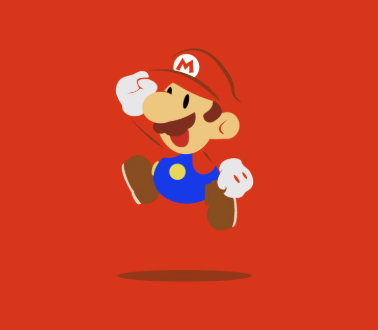

### **Tutorial Contributions**
***A: Project idea:***

- Archita: Found dataset since we wanted a dataset with categorical and numerical data.

***B: Dataset Curation and Preprocessing***

- Dia, Henry: Created and applied data cleaning techniques on the DataFrame.

***C: Data Exploration and Summary Statistics***

- Dia: Conducted part of the exploratory data analysis using a chi-squared test to determine relationships between publishers and Wii game genres.

- Archita: Calculated outlier data and ANOVA Tests and created visualizations for Box and Whisker Plots for Global Sales Data.

- Monu: Conducted Spearman's Rank Correlation test to determine whether or not there's a relationship between video games year release date and global sales.

- Henry, Dwarakesh: Created many beautiful visualizations of data found under the Data Visualization section.

***D: ML Algorithm Design/Development***

- Dia, Henry, Dwarakesh: Designed a K-Means clustering model in the section "K-Means Clustering (Part 1) to identify publishers' tendencies to make "hit" and "flop" video games.

- Monu: Conducted K-means clustering in the section labeled "K-Means Clustering (Part 2)" for answering the research question of best performing genre given a platform and year.

- Archita: Designed a Linear Regression model and created multiple feature experimentation to test significance of features on the prediction of global sales.

***E: ML Algorithm Training and Test Data Analysis:***

- Dia: Implemented elbow method for finding ideal number of clusters (4) for K-Means clustering.

- Henry: Handled feature engineering through aggregating game data by publisher and defining hit/flop cutoffs for game sales.

- Dwarakesh: Implemented PCA to handle the high dimensionality of the data.

***F: Visualization, Result Analysis, Conclusion:***

- Dia, Henry: Created a visualization for clusters.

- Archita: Created a scatter plot to showcase the expected vs predicted values of global sales on training and test data.

- Monu: Created corresponding summary of results and bar graph visualizations for their designated research question.

- Dwarakesh: Created a PCA visualization.

***G: Final Tutorial Report Creation***

- Dia: Organized checkpoints 1, 2, and 3 into the final notebook and added sections throughout each checkpoint to explain steps.

- Archita: Compiled introduction and conclusion sections.

# **Introduction**
By: Dia Nawathe, Archita Naik, Monu Sunkara, Henry Gardiner, and Dwarakesh Baraneethan

The popularity of video games has been immense for the past few decades. Classic games like Tetris, Minecraft, and Super Mario are household favorites despite being different categories and from different companies. Using the data set Video Game Sales from Kaggle, our group wanted to ask specific questions that can help us understand if the success of video games can be predicted with certain features and better understand traits of the data.

In this tutorial, we will showcase our data curation, Explanatory Data Analysis (EDA), and use machine learning techniques to reveal further insights about the video game sales. We also want to showcase visualizations of data to increase our knowledge about the data.

By the end of the tutorial, we would like to answer 3 main questions using this data set:

Which publishers are considered successful (Top 40% in sales) and which publishers flopped?

Given a platform and a year, what genre would succeed? Can we group specific video game platforms based on the types of games that sell well and then figure out which single genre is a best seller in each group?

Can we accurately predict the global sales of a video game based on categorical features like the Genre, Publisher, and Platform using a regression model?



## **Loading Libraries & Dataset** 💻

#### *In this section, you'll import libraries for use throughout the tutorial and read in a CSV file containing both numerical and categorical data.*

Below are the libraries that you'll need for this tutorial:

In [3]:
# Data curation and preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# Exploratory analysis and statistics
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import spearmanr

# ML training
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import yellowbrick.cluster.elbow as elbow_module
from yellowbrick.cluster.elbow import distortion_score
from mpl_toolkits.mplot3d import Axes3D



For this tutorial, we'll be working with the [Video Game Sales dataset](https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download) by user `GregorySmith` on Kaggle, which provides regional and sales information for a wide variety of games from different publishers, genres, and platforms. Click the hyperlink to go to the dataset on Kaggle and be sure to download the data before proceeding with the rest of the tutorial.

For starters, let's import the `vgsales` dataset and see the type of information we're working with:

In [4]:
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Our dataset consists of a Rank, Name of game, Platform the game is hosted on, Year of release, Genre, Publisher, and NA_Sales (Sales in North America), EU_Sales (Sales in Europe), JP_Sales (Sales in Japan), Other_Sales (Sales in other regions), and Global_Sales (Sales globally).

## **Organizing & Cleaning the Data** 🧹

#### *In this section, you will check out the dataset to see what you're working with and will learn how to prepare data for more complex analysis.*

Based on the dataset's column information, we see a bit of discrepancy with the number of non-null values in the data, specifically in the `Year` and `Publisher` columns. We want to make sure that the data we're working with is complete and doesn't have any 'holes', or NA/null values. We will drop rows that are missing data for "Year" and fill NaN for publisher data with "Unknown". Below is our process for data cleaning:

In [5]:
vgsales_df = vgsales_df.dropna(subset=['Year']) # dropping NA values in the `Year` column
vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna('Unknown') # putting in placeholder values for unknown publishers
vgsales_df.head() # viewing the dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We have a lot of information on video game sales in both regional and global scopes. Let's find the outliers for the sales in each region and cumulatively:

In [6]:
# Finding Outliers in Sales Data
def findSaleOutliers(sales_type: str):
  # Find 1st and 3rd quartile
  q1 = vgsales_df[sales_type].quantile(0.25)
  q3 = vgsales_df[sales_type].quantile(0.75)
  # Find Interquartile Range
  iqr = q3 - q1
  # Find lower bound
  lb = q1 - 1.5 * iqr
  # Find upper bound
  ub = q3 + 1.5 * iqr
  # Gets the percentage of outlier data that are lower than the lower bound and
  # greater than the upper bound
  outlier_percentage = len(vgsales_df[(vgsales_df[sales_type] < lb) |
   (vgsales_df[sales_type] > ub)][sales_type])/len(vgsales_df[sales_type])
  return str(outlier_percentage)
  # Prints out percentage of outlier in sales data for EU, NA, JP, Global, Other
print("Percentage of Outliers in EU Sales: " +findSaleOutliers('EU_Sales'))
print("Percentage of Outliers in NA Sales: " +findSaleOutliers('NA_Sales'))
print("Percentage of Outliers in JP Sales: " +findSaleOutliers('JP_Sales'))
print("Percentage of Outliers in Global Sales: " +findSaleOutliers('Global_Sales'))
print("Percentage of Outliers in Other Sales: " +findSaleOutliers('Other_Sales'))

Percentage of Outliers in EU Sales: 0.12580388313835977
Percentage of Outliers in NA Sales: 0.10167207692778833
Percentage of Outliers in JP Sales: 0.14742451154529307
Percentage of Outliers in Global Sales: 0.11190053285968028
Percentage of Outliers in Other Sales: 0.10075335334109144


Let's take a look at which genre and which platform show up most frequently in this dataset:

In [7]:
print("The mode of genres in Nintendo is", vgsales_df['Genre'].mode()[0])
print("The mode of platforms in Nintendo is", vgsales_df['Platform'].mode()[0])

The mode of genres in Nintendo is Action
The mode of platforms in Nintendo is DS


## **Exploratory Data Analysis & Hypothesis Testing** 💭

#### *In this section, you will learn about how to apply various statistical tests to a dataset and how they can help you to gain valuable and interesting insights about the data.*

Now that we've cleaned up the data and have a better understanding of the values we're working with, we're going to explore the dataset a bit more through hypothesis testing. Given the mix of numerical and categorical data, there's a lot of options for statistical tests! Some of our ideas for statistical testing are shown below.

### ANOVA
Here, we're using an ANOVA Test to see if there are differences between genre groups using a significance level of 0.05.

**Null Hypothesis:** There is no difference between the global sales for different genres of top 1000 ranked video games sold before the year 2000.

**Alternate Hypothesis:** There is a difference between the global sales for different genres of top 1000 ranked video games sold before the year 2000.

In [8]:
'''Gets the rows of video games data that are within the first 1000 ranks and made
before the year 2000'''

top_ranked = vgsales_df[(vgsales_df['Rank'] <= 1000) & (vgsales_df['Year'] < 2000)]

#Gets the Global Sales column for each genre of video game
sports = (top_ranked[top_ranked['Genre']=='Sports']).filter(items=['Global_Sales'])['Global_Sales']
platform = (top_ranked[top_ranked['Genre']=='Platform']).filter(items=['Global_Sales'])['Global_Sales']
racing = (top_ranked[top_ranked['Genre']=='Racing']).filter(items=['Global_Sales'])['Global_Sales']
role_playing = (top_ranked[top_ranked['Genre']=='Role-Playing']).filter(items=['Global_Sales'])['Global_Sales']
puzzle = (top_ranked[top_ranked['Genre']=='Puzzle']).filter(items=['Global_Sales'])['Global_Sales']
misc = (top_ranked[top_ranked['Genre']=='Misc']).filter(items=['Global_Sales'])['Global_Sales']
shooter = (top_ranked[top_ranked['Genre']=='Shooter']).filter(items=['Global_Sales'])['Global_Sales']
sim = (top_ranked[top_ranked['Genre']=='Simulation']).filter(items=['Global_Sales'])['Global_Sales']
action = (top_ranked[top_ranked['Genre']=='Action']).filter(items=['Global_Sales'])['Global_Sales']
fighting = (top_ranked[top_ranked['Genre']=='Fighting']).filter(items=['Global_Sales'])['Global_Sales']
adventure = (top_ranked[top_ranked['Genre']=='Adventure']).filter(items=['Global_Sales'])['Global_Sales']
strategy = (top_ranked[top_ranked['Genre']=='Strategy']).filter(items=['Global_Sales'])['Global_Sales']

#ANOVA Test
anova_test = f_oneway(sports, platform, racing, role_playing, puzzle, misc,
                      shooter,
                sim, action, fighting, adventure, strategy)

#Prints out the p-value
print("P value : "+str(anova_test.pvalue))

#Performs a Tukey HSD Post-Hoc Test to see genres that had the most/least diff.
post_hoc = scipy.stats.tukey_hsd(sports, platform, racing, role_playing, puzzle,
                                 misc, shooter, sim, action, fighting, adventure, strategy)
print(post_hoc)

P value : 0.09005392098614962
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -3.974     0.149    -8.505     0.557
 (0 - 2)     -1.729     0.994    -6.899     3.441
 (0 - 3)     -3.233     0.613    -8.292     1.826
 (0 - 4)     -5.044     0.404   -11.966     1.877
 (0 - 5)     -0.415     1.000    -6.626     5.796
 (0 - 6)     -2.997     0.874    -8.891     2.898
 (0 - 7)     -0.202     1.000    -7.468     7.064
 (0 - 8)     -1.309     0.999    -6.119     3.500
 (0 - 9)     -0.942     1.000    -6.318     4.434
 (0 - 10)     -1.548     1.000    -8.814     5.719
 (0 - 11)     -1.003     1.000    -7.925     5.919
 (1 - 0)      3.974     0.149    -0.557     8.505
 (1 - 2)      2.245     0.881    -2.214     6.704
 (1 - 3)      0.741     1.000    -3.589     5.071
 (1 - 4)     -1.070     1.000    -7.478     5.338
 (1 - 5)      3.559     0.630    -2.074     9.192
 (1 - 6)      0.977     1.000    -4.305     6.260
 (1 - 7)    

Based on the p-value of 0.090 > 0.05, we fail to reject the null hypothesis. This means that there is no significant difference between genres of video games created before the year 2000 in the top 1000 rank.

After conducting the Post-Hoc Test, we can see that many genres have p-values of 1.000 when compared to other genres. For instance, 1-4 represents a comparison between platform and puzzle games and the p-value for this comparison is 1.000, suggesting almost no difference.

For a self-analysis, the numbers represent the following genres:

- 0: Sports
- 1: Platform
- 2: Racing
- 3: Role Playing
- 4: Puzzle
- 5: Misc
- 6: Shooter
- 7: Simulation
- 8: Action
- 9: Fighting
- 10: Adventure
- 11: Strategy

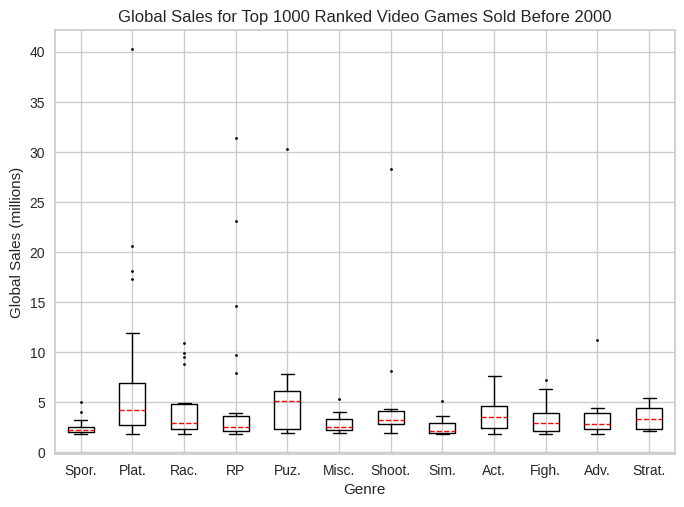

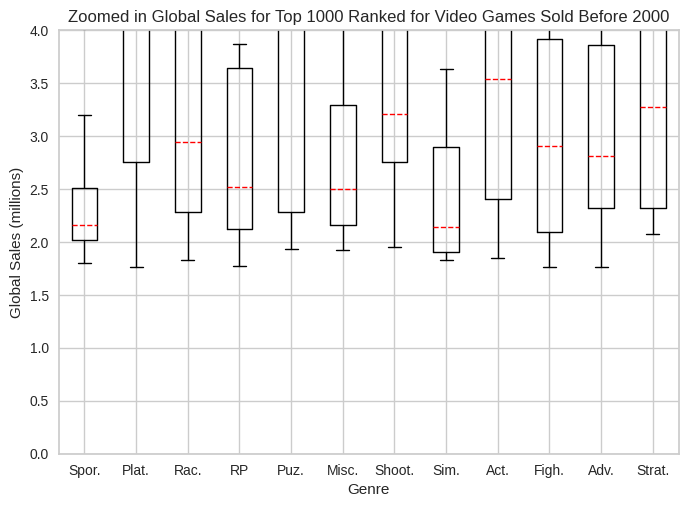

In [9]:
#Sets color and marker type
flier_props = dict(markerfacecolor='g', marker='.', markersize=2)

#Plots the box plots for each genre
plt.boxplot([sports, platform, racing, role_playing, puzzle, misc,
             shooter, sim, action, fighting, adventure, strategy],tick_labels=[
    'Spor.', 'Plat.', 'Rac.','RP', 'Puz.', 'Misc.', 'Shoot.',
    'Sim.', 'Act.', 'Figh.', 'Adv.', 'Strat.'],
            flierprops=flier_props, medianprops=dict(color='red', linewidth=1,
                                                     linestyle='--'))
#Title
plt.title("Global Sales for Top 1000 Ranked Video Games Sold Before 2000")
#Plots Genre vs. Global Sales
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.show()

#Zoomed-in version to be able see the box
plt.boxplot([sports, platform, racing, role_playing, puzzle, misc,
             shooter, sim, action, fighting, adventure, strategy],tick_labels=[
    'Spor.', 'Plat.', 'Rac.','RP', 'Puz.', 'Misc.', 'Shoot.',
    'Sim.', 'Act.', 'Figh.', 'Adv.', 'Strat.'],
            flierprops=flier_props, medianprops=dict(color='red', linewidth=1,
                                                     linestyle='--'))
plt.title("Zoomed in Global Sales for Top 1000 Ranked for Video Games Sold Before 2000")
plt.ylim(0, 4)
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.show()

**Null Hypothesis:** There is no difference between the global sales for different genres of video games sold before the year 2000.

**Alternate Hypothesis:** There is a difference between the global sales for different genres of video games sold before the year 2000.

We'll now use another ANOVA Test to see if there are differences between genre groups using a significance level of 0.05.

In [10]:
sales_before_2000 = vgsales_df[(vgsales_df['Year'] < 2000)]

sports = (sales_before_2000 [sales_before_2000 ['Genre']=='Sports']).filter(items=['Global_Sales'])['Global_Sales']
platform = (sales_before_2000[sales_before_2000['Genre']=='Platform']).filter(items=['Global_Sales'])['Global_Sales']
racing = (sales_before_2000[sales_before_2000['Genre']=='Racing']).filter(items=['Global_Sales'])['Global_Sales']
role_playing = (sales_before_2000[sales_before_2000['Genre']=='Role-Playing']).filter(items=['Global_Sales'])['Global_Sales']
puzzle = (sales_before_2000[sales_before_2000['Genre']=='Puzzle']).filter(items=['Global_Sales'])['Global_Sales']
misc = (sales_before_2000[sales_before_2000['Genre']=='Misc']).filter(items=['Global_Sales'])['Global_Sales']
shooter = (sales_before_2000[sales_before_2000['Genre']=='Shooter']).filter(items=['Global_Sales'])['Global_Sales']
sim = (sales_before_2000[sales_before_2000['Genre']=='Simulation']).filter(items=['Global_Sales'])['Global_Sales']
action = (sales_before_2000[sales_before_2000['Genre']=='Action']).filter(items=['Global_Sales'])['Global_Sales']
fighting = (sales_before_2000[sales_before_2000['Genre']=='Fighting']).filter(items=['Global_Sales'])['Global_Sales']
adventure = (sales_before_2000[sales_before_2000['Genre']=='Adventure']).filter(items=['Global_Sales'])['Global_Sales']
strategy = (sales_before_2000[sales_before_2000['Genre']=='Strategy']).filter(items=['Global_Sales'])['Global_Sales']

test = f_oneway(sports, platform, racing, role_playing, puzzle, misc, shooter,
                sim, action, fighting, adventure, strategy)
print(test.pvalue)

post_hoc = scipy.stats.tukey_hsd(sports, platform, racing, role_playing, puzzle, misc, shooter, sim, action, fighting, adventure, strategy)
print(post_hoc)


1.8319002865495784e-12
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.549     0.000    -2.205    -0.893
 (0 - 2)     -0.304     0.905    -0.921     0.313
 (0 - 3)     -0.557     0.140    -1.184     0.071
 (0 - 4)     -0.583     0.429    -1.389     0.223
 (0 - 5)     -0.034     1.000    -0.748     0.681
 (0 - 6)     -0.224     0.993    -0.868     0.420
 (0 - 7)     -0.044     1.000    -0.853     0.766
 (0 - 8)     -0.288     0.904    -0.873     0.296
 (0 - 9)     -0.116     1.000    -0.727     0.494
 (0 - 10)      0.046     1.000    -0.731     0.823
 (0 - 11)      0.080     1.000    -0.636     0.796
 (1 - 0)      1.549     0.000     0.893     2.205
 (1 - 2)      1.245     0.000     0.517     1.974
 (1 - 3)      0.992     0.001     0.255     1.730
 (1 - 4)      0.966     0.021     0.071     1.860
 (1 - 5)      1.516     0.000     0.703     2.328
 (1 - 6)      1.325     0.000     0.574     2.077
 (1 - 7)      1.506

Based on the p-value of 1.8319002865495784e-12
< 0.05, we can reject the null hypothesis. This means that there is a significant difference between genres of video games created before the year 2000.

After conducting the Post-Hoc Test, we can see that many genres have p-values of 0.000 when compared to other genres. For instance, 9-1 represents a comparison between fighting and platform and the p-value for this comparison is 0.000, suggesting a statistically significant difference.

For a self-analysis, the numbers represent the following genres:

- 0: Sports
- 1: Platform
- 2: Racing
- 3: Role Playing
- 4: Puzzle
- 5: Misc
- 6: Shooter
- 7: Simulation
- 8: Action
- 9: Fighting
- 10: Adventure
- 11: Strategy

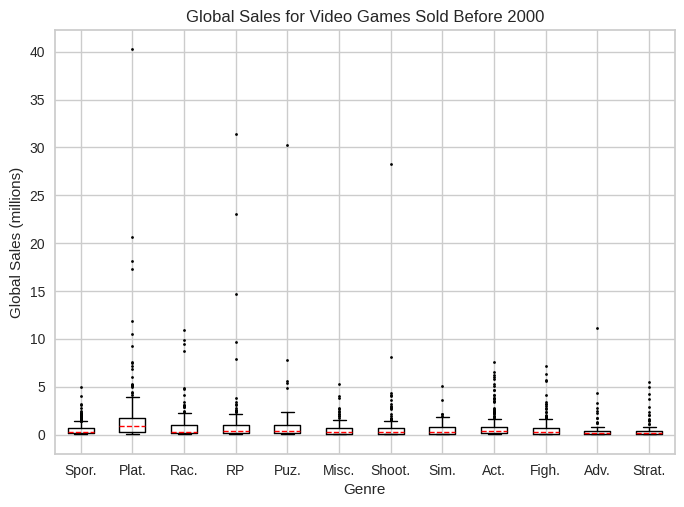

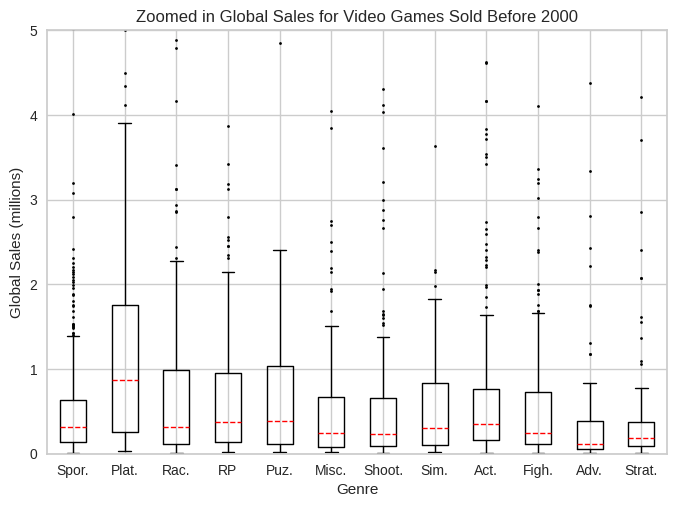

In [11]:
# Determines color and marker type for points
flier_props = dict(markerfacecolor='g', marker='.', markersize=2)
# Plot each box plot for specific genres
plt.boxplot([sports, platform, racing, role_playing, puzzle, misc,
             shooter, sim, action, fighting, adventure, strategy],tick_labels=[
    'Spor.', 'Plat.', 'Rac.','RP', 'Puz.', 'Misc.', 'Shoot.',
    'Sim.', 'Act.', 'Figh.', 'Adv.', 'Strat.'],
            flierprops=flier_props, medianprops=dict(color='red', linewidth=1,
                                                     linestyle='--'))
plt.title("Global Sales for Video Games Sold Before 2000")
# Plot Genre vs. Global Sales
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.show()
plt.boxplot([sports, platform, racing, role_playing, puzzle, misc,
             shooter, sim, action, fighting, adventure, strategy],tick_labels=[
    'Spor.', 'Plat.', 'Rac.','RP', 'Puz.', 'Misc.', 'Shoot.',
    'Sim.', 'Act.', 'Figh.', 'Adv.', 'Strat.'],
            flierprops=flier_props, medianprops=dict(color='red', linewidth=1,
                                                     linestyle='--'))

# This provides a zoomed in view of the graph to see each box
plt.title("Zoomed in Global Sales for Video Games Sold Before 2000")
plt.ylim(0, 5)
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.show()

### Chi-Squared Test

Next, we're doing a chi-squared test to observe whether there's a relationship between publishers and the genres of Wii games they make.

**Null Hypothesis:** The genre of a Wii game does not have an effect on the likelihood of the publisher type.

**Alternative Hypothesis:** The genre of a Wii game does have an effect on the likelihood of the publisher type.

First, we need to set up a contingency table, which will tell us the frequency distribution of the number of each type of games made for every publisher:

In [12]:
vgnew = vgsales_df[vgsales_df['Platform']=='Wii']
cont_table = pd.crosstab(vgnew['Publisher'], vgnew['Genre'])
display(cont_table)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
505 Games,3,0,1,6,0,2,0,0,3,7,8,0
7G//AMES,0,0,0,1,0,0,0,0,0,1,0,0
Ackkstudios,1,0,0,0,0,0,0,1,0,0,0,0
Activision,33,6,0,21,3,0,11,2,8,2,22,1
Activision Value,0,0,0,0,0,0,0,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
XS Games,0,0,0,0,0,0,1,0,0,0,3,0
Xplosiv,0,0,0,1,0,0,1,0,0,0,0,0
Zoo Digital Publishing,1,3,1,2,0,3,5,0,0,0,3,0


Now, let's run a chi-square test and get its p-value:

In [13]:
p_val = scipy.stats.chi2_contingency(cont_table).pvalue
print("Chi-square test p-value: " + str(p_val))

Chi-square test p-value: 3.45826369890388e-67


Since the p-value is 3.45826369890388e-67, which is less than our critical value of 0.05, we can reject the null hypothesis, which suggests that there is a relationship between the genre and publisher of Wii games.

To visualize the frequencies, let's look at the information in a bar graph:

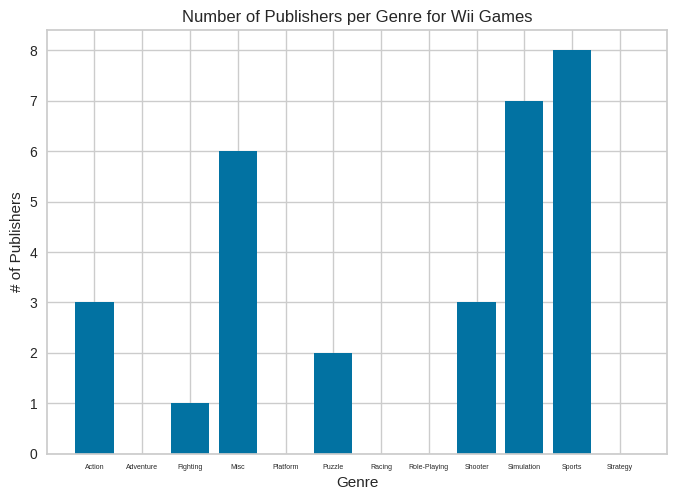

In [14]:
plt.bar(cont_table.columns, cont_table.values[0])
plt.title("Number of Publishers per Genre for Wii Games")
plt.xlabel("Genre")
plt.xticks(fontsize=5)
plt.ylabel("# of Publishers")
plt.show()

### Spearman's Rank Correlation

Lastly, let's look at whether there's a relationship between video games and global sales.

**Null Hypothesis:** There is no correlation between year and global sales of video games.

**Alternate Hypothesis:** There is a correlation between year and global sales of video games.

The p-value of the test is: 0.000198


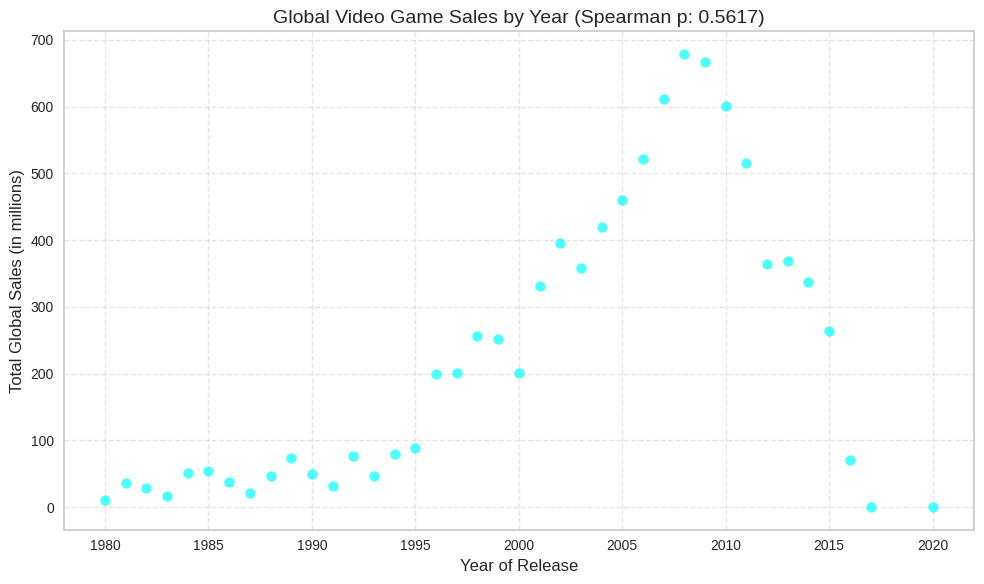

In [15]:
# drops missing values from both columns
final_df = vgsales_df[['Year', 'Global_Sales']].dropna()

# group the data by year and calculate the total global sales for that year
sales_by_year = final_df.groupby('Year')['Global_Sales'].sum()

# obtains the index (years) and the values (total sales) from the series
years = sales_by_year.index.values # index contains the year values
total_sales = sales_by_year.values # values contain the summed Global_Sales

res = spearmanr(years, total_sales)
correlation = res.statistic
p_value = res.pvalue

print(f"The p-value of the test is: {p_value:.6f}")

# gorgeous plot
plt.figure(figsize=(10, 6))
plt.scatter(years, total_sales, color='cyan', alpha=0.7)
plt.title(f'Global Video Game Sales by Year (Spearman p: {correlation:.4f})', fontsize=14)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Total Global Sales (in millions)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

We reject the null hypothesis (H0) because the p-value of 0.000198 is less than the standard significance level of alpha = 0.05. Therefore, there is sufficient strong statistical evidence of a correlation between the year and the total global sales.

## **Data Visualization** 📈

#### *In this section, you'll learn about the value of data visualization and explore different ways to visually represent and display the dataset.*

Another great way to explore our data is through visuals. Below are graphs showing relationships between variables like sales, publishers, and genres. Below are some of interesting finds.

In this dataset, we have a lot of information about video games sales in different regions around the world. Let's take a look at the total sales per region:

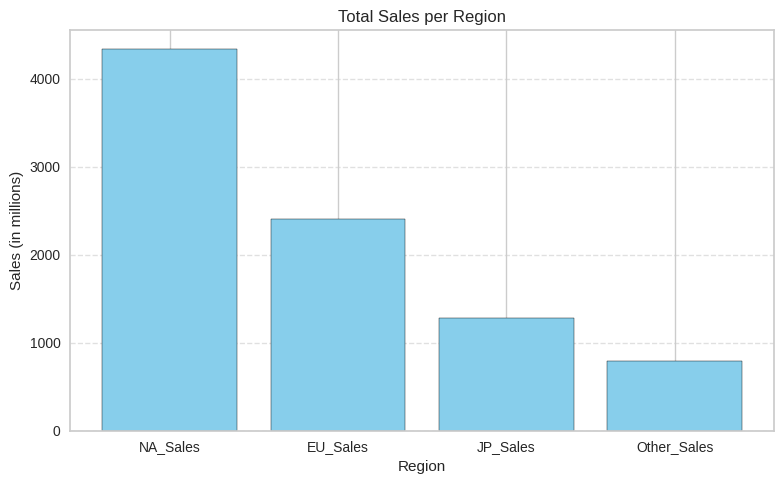

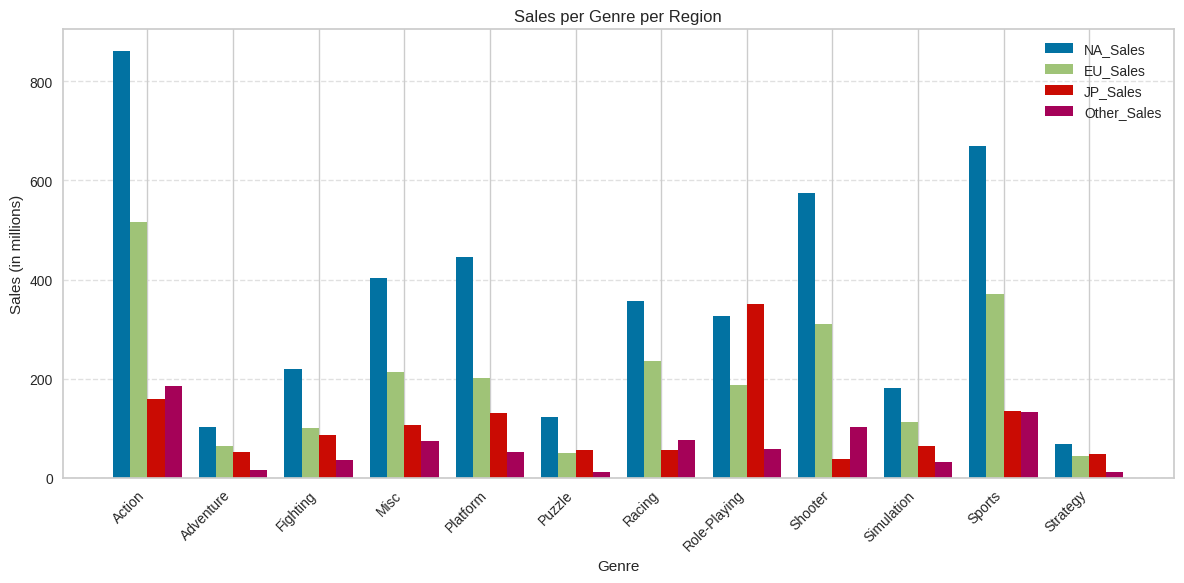

In [16]:
# Total Sales per Region
region_sales = vgsales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 5))
plt.bar(region_sales.index, region_sales.values, color='skyblue', edgecolor='black')
plt.title('Total Sales per Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Region')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Sales per genre per region
genre_sales = vgsales_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(12, 6))
x = range(len(genre_sales))
width = 0.2

plt.bar([i - 1.5*width for i in x], genre_sales['NA_Sales'], width=width, label='NA_Sales')
plt.bar([i - 0.5*width for i in x], genre_sales['EU_Sales'], width=width, label='EU_Sales')
plt.bar([i + 0.5*width for i in x], genre_sales['JP_Sales'], width=width, label='JP_Sales')
plt.bar([i + 1.5*width for i in x], genre_sales['Other_Sales'], width=width, label='Other_Sales')

plt.xticks(x, genre_sales.index, rotation=45, ha='right')
plt.title('Sales per Genre per Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Genre')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

We can also take a look at which publishers are the biggest based on global sales:

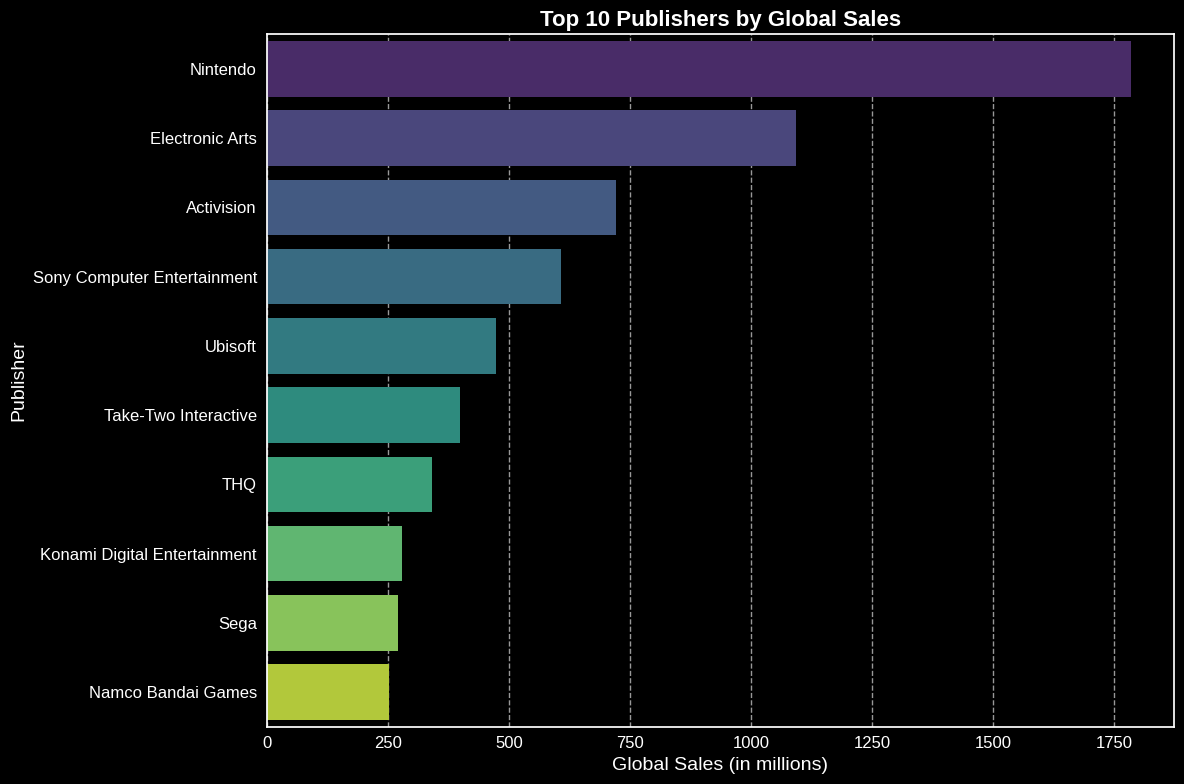

In [17]:
publisher_sales = vgsales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='viridis')
plt.xlabel('Global Sales (in millions)', fontsize=14, color='white')
plt.ylabel('Publisher', fontsize=14, color='white')
plt.title('Top 10 Publishers by Global Sales', fontsize=16, color='white', fontweight='bold')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Next, we'll take a look at how global video game sales have been changing over time:

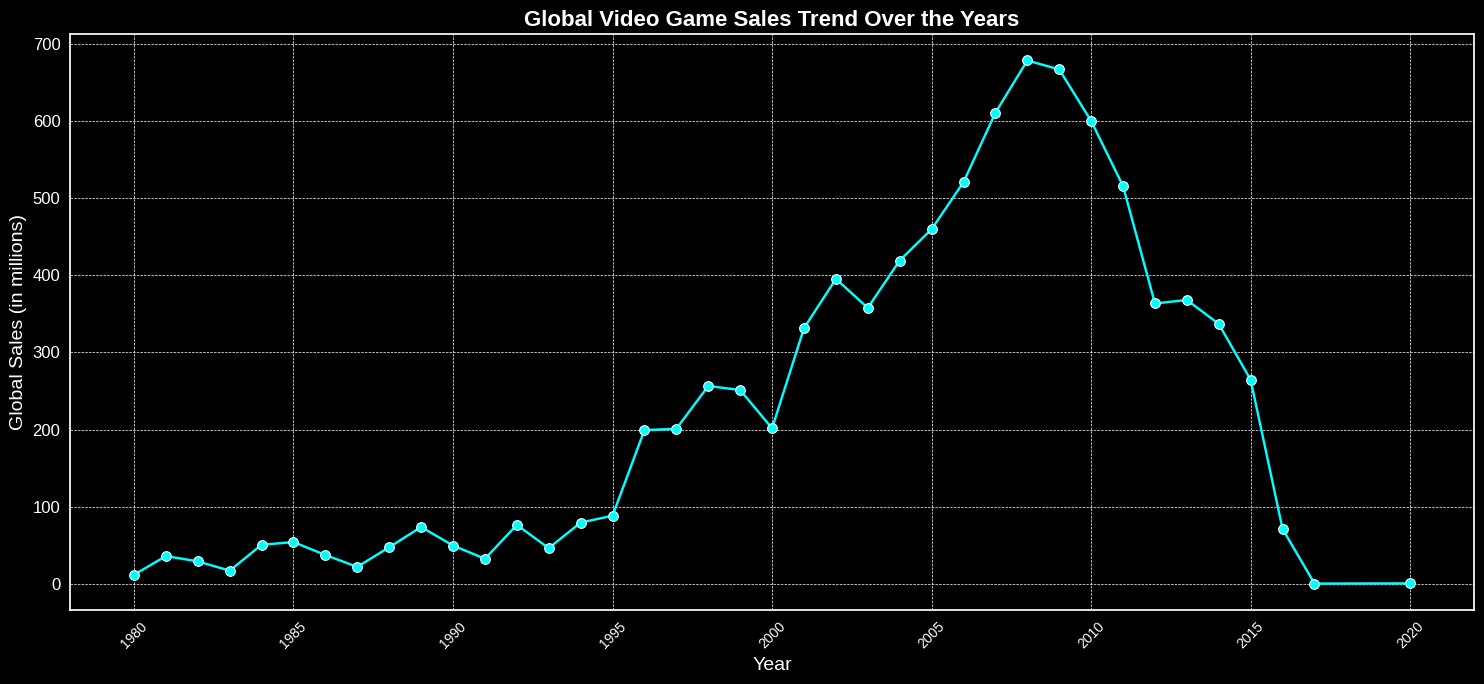

In [18]:
yearly_sales = vgsales_df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='Year', y='Global_Sales', data=yearly_sales, color='cyan', marker='o')
plt.xlabel('Year', fontsize=14, color='white')
plt.ylabel('Global Sales (in millions)', fontsize=14, color='white')
plt.title('Global Video Game Sales Trend Over the Years', fontsize=16, color='white', fontweight='bold')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Overall, there's a lot of interesting information we can extract from this dataset. We can see how sales change over time, how different games are received in different regions of the world, and the tendencies that publishers tend to make in releasing games. We hope this tutorial gave a better idea of how data cleaning and exploratory analysis can provide us with valuable insights.

## **Machine Learning Analysis & Visualizations** 🔢 📈

#### *In this section, you'll use your knowledge of the dataset to extract more complex insights on video game sales and will use machine learning to answer the questions we posed at the outset of this tutorial.*

Finally, we're at the exciting part of machine learning! Machine learning is an especially important part of data science because it not only provides us with more complex analysis capabilities but also allows us to use this information to make predictions about new data points. We can also analyze trends and visualize them in a more sophisticated way by clustering similar data points together.

While the possibilities are endless for ML models, we'll be looking at two popular models in this tutorial: Linear Regression and K-Means.

### Linear Regression

Can we accurately predict the global sales of a video game based on categorical features like the Genre, Publisher, and Platform?

Let's use linear regression to answer this question! Linear regression is a great choice since we can predict continuous values based on the features we have available to work with. We can understand the impact of each feature on our predictions by calculating an R^2 score.

In this experiment, we will not be considering the name of the video game to be a feature.

In [19]:
# quick data cleaning function
def clean_data(df):
  new_df = df.dropna()
  return new_df

# read csv and clean data
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df = clean_data(vgsales_df)

# drop `Name` column
vgsales_df.drop('Name', axis=1, inplace=True)
vgsales_df = clean_data(vgsales_df)

Before we fit the Linear Regression model, we need to find a good way to encode our data into numerical values.

Based on the columns, we need to encode 'Platform', 'Genre', and 'Publisher' since these are categorical data. Since we want to avoid giving cardinality to any of these categories, we'll use the One-Hot encoding technique.

Let's write a function to create an encoded data frame for video game data that keeps the publisher, platform, and genre as required features. We'd like this function to return the encoded data frame and OneHotEncoders for Publisher, Platform, and Genre. Returning the encoders allows us to encode any data point that we want to apply the Linear Regression model to for predicting global sales.

In [20]:
def encoder(df_input):
  df = df_input

  # create a OneHotEncoder for Platform, Publisher, and Genre (categorical data)
  platform_encoder = OneHotEncoder(sparse_output=False).fit(pd.DataFrame(df['Platform']))
  publisher_encoder = OneHotEncoder(sparse_output=False).fit(pd.DataFrame(df['Publisher']))
  genre_encoder = OneHotEncoder(sparse_output=False).fit(pd.DataFrame(df['Genre']))


  # transform the Platform column, turn into a DataFrame and reset the index
  encoded_platform = platform_encoder.transform(pd.DataFrame(df['Platform']))
  platform_df = pd.DataFrame(encoded_platform, columns=platform_encoder.get_feature_names_out(['Platform']))
  platform_df.reset_index(drop=True, inplace=True)

  # transform the Publisher column, turn into a DataFrame and reset the index
  encoded_publisher = publisher_encoder.transform(pd.DataFrame(df['Publisher']))
  publisher_df = pd.DataFrame(encoded_publisher, columns=publisher_encoder.get_feature_names_out(['Publisher']))
  publisher_df.reset_index(drop=True, inplace=True)

  # transform the Genre column, turn into a DataFrame and reset the index
  encoded_genre = genre_encoder.transform(pd.DataFrame(df['Genre']))
  genre_df = pd.DataFrame(encoded_genre, columns=genre_encoder.get_feature_names_out(['Genre']))
  genre_df.reset_index(drop=True, inplace=True)

  # drop the columns prior to transformation
  df.drop(['Platform', 'Publisher', 'Genre'], inplace=True, axis=1)
  df.reset_index(drop=True, inplace=True)

  df_encoded = df

  # add each column back into one DataFrame
  for col in platform_df.columns:
    df_encoded[col] = platform_df[col]

  for col in publisher_df.columns:
    df_encoded[col] = publisher_df[col]

  for col in genre_df.columns:
    df_encoded[col] = genre_df[col]


  # reset the index again
  df_encoded.reset_index(drop=True, inplace=True)

  # return the encoded df and OneHot Encoders for platform, publisher, genre
  return df_encoded, platform_encoder, publisher_encoder, genre_encoder

Now, we have our encoded DataFrame and encoders. After collecting the target labels for Global_Sales, we'll drop this column since this is the part that we want to predict with the model.

In [21]:
# encode the dataframe and get encoders
df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(vgsales_df)

# get target labels of Global Sales
sales = df_encoded['Global_Sales']

# drop labels from df
df_encoded.drop('Global_Sales', axis=1, inplace=True)

Let's split the data into training and test sets: for this model, we'll keep 80% as training data and the other 20% as test data. Then, we can train our Linear Regression model!

In [22]:
# split data into training data and testing data with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_encoded, sales,
                                                    test_size=0.2, shuffle=False)

# instatiate the Linear Regression model
model = LinearRegression()

# train model by fitting training data
model.fit(X_train, y_train)

# get predictions for training and testing data
predTrain = model.predict(X_train)
predTest_std = model.predict(X_test)

We can evaluate the performance of the model by calculating the R^2 score.

In [23]:
# calculate R^2 score for both predictions
r2_train = r2_score(y_train, predTrain)
r2_test_std = r2_score(y_test, predTest_std)

print("R^2 for X_train predictions: "+str(r2_train))
print("R^2 for X_test predictions: "+str(r2_test_std))


R^2 for X_train predictions: 0.999990406632961
R^2 for X_test predictions: 0.856854980107774


The R^2 for global sales predictions in the training set is incredibly high at 0.99. This can be validated by seeing how the expected sales meets the predicted sales for the majority of the data; however, this also potentially indicates an overfitting of the model.

The R^2 for global sales predictions in the test set is around 0.85. This is a good value for R^2, indicated a solid fit which is not overfitting the data.



To get a visual evaluation of the model, we'll plot the expected vs. predicted values for the training predictions and test predictions. The coordinate of each point represents `(expected sales, predicted sales)`.

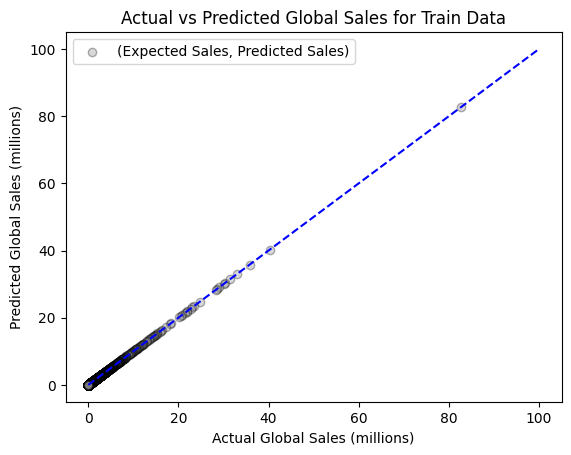

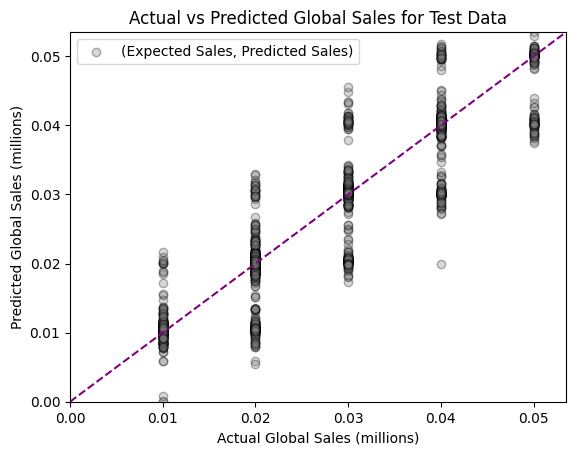

In [24]:
# scatterplot for training data
plt.style.use('default')
plt.scatter(y_train, predTrain, alpha=0.3, color='grey', edgecolors='black',
            label='(Expected Sales, Predicted Sales)')
plt.xlabel("Actual Global Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("Actual vs Predicted Global Sales for Train Data")

plt.legend()
plt.plot([0, 100], [0, 100], color='blue', linestyle='--')

plt.show()

# scatterplot for testing data
plt.scatter(y_test, predTest_std, alpha=0.3, color='grey', edgecolors='black',
             label='(Expected Sales, Predicted Sales)')
plt.xlabel("Actual Global Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("Actual vs Predicted Global Sales for Test Data")

plt.legend()
plt.plot([0, predTest_std.max()], [0, predTest_std.max()], color='purple', linestyle='--')
plt.xlim(0, max(y_test.max(), predTest_std.max()))
plt.ylim(0, max(y_test.max(), predTest_std.max()))

plt.show()

While the model had a good R^2 value for predictions on the test set, we can see in the visualization that the model sometimes misses the mark for predicting an accurate value.

On the other hand, the high R^2 value for predictions on the training set can be validated by seeing how the expected sales meets the predicted sales for the majority of the data.

Let's gather some data from https://www.vgchartz.com/ (the same website where the data from our data set is from) to test whether our model can make a good prediction on data that is not in the training set or testing set.

First, we'll write a function that allows us to make predictions by removing a certain feature from the model (or not).

In [25]:
def make_prediction(data, model, encoder_pm, encoder_ps, encoder_g, ignoreFeature='None'):
  df = pd.DataFrame(data) # turn data into a dataframe

  # if name has not been removed from data, remove it
  if('Name' in df.columns):
    df.drop('Name', inplace=True, axis=1)

  # if Platform is not a removed feature
  if(ignoreFeature!='Platform'):
    # transform platform data
    encoded_platform = encoder_pm.transform(pd.DataFrame(df['Platform']))

    # turn transformed vector into a DataFrame
    platform_df = pd.DataFrame(encoded_platform, columns=encoder_pm.get_feature_names_out(['Platform']))

    # reset the index
    platform_df.reset_index(drop=True, inplace=True)

    # drop the original platform column from the DataFrame
    df.drop('Platform', inplace=True, axis=1)


  if(ignoreFeature!='Publisher'): # if Publisher is not a removed feature
    # transform publisher data
    encoded_publisher = encoder_ps.transform(pd.DataFrame(df['Publisher']))

    # turn transformed vector into a DataFrame
    publisher_df = pd.DataFrame(encoded_publisher, columns=encoder_ps.get_feature_names_out(['Publisher']))

    # reset the index
    publisher_df.reset_index(drop=True, inplace=True)

    # drop the original publisher column from the DataFrame
    df.drop('Publisher', inplace=True, axis=1)


  if(ignoreFeature!='Genre'): # if genre is not a removed feature
    # transform genre data
    encoded_genre = encoder_g.transform(pd.DataFrame(df['Genre']))

    # turn transformed vector into a DataFrame
    genre_df = pd.DataFrame(encoded_genre, columns=encoder_g.get_feature_names_out(['Genre']))

    # reset the index
    genre_df.reset_index(drop=True, inplace=True)

    # drop the original genre column from the DataFrame
    df.drop('Genre', inplace=True, axis=1)


  # reset the overall index
  df.reset_index(drop=True, inplace=True)

  df_new = df

  # concat columns from desired features into dataframe
  if(ignoreFeature!='Platform'):
    for col in platform_df.columns:
      df_new[col] = platform_df[col]

  if(ignoreFeature!='Publisher'):
    for col in publisher_df.columns:
      df_new[col] = publisher_df[col]

  if(ignoreFeature!='Genre'):
    for col in genre_df.columns:
      df_new[col] = genre_df[col]

  # reset the index again
  df_new.reset_index(drop=True, inplace=True)

  # return a prediction using the model parameter
  return model.predict(df_new)

Below is a new data point representing the game "WarioWare Gold" that was released in 2016 (according to [VGChartz](https://www.google.com/url?q=https%3A%2F%2Fwww.vgchartz.com%2F)).

We'll use this an example to see what prediction the model makes based on certain features being obscured from the data.

In [26]:
data = {"Rank": [269],
        "Name": ["WarioWare Gold"],
        "Year": [2016], "Genre": ['Misc'],
        "Publisher": ["Nintendo"],
        "Platform": ["3DS"],
        "NA_Sales": [0.11],
        "EU_Sales": [0.03],
        "JP_Sales": [0.13],
        "Other_Sales": [0.01]}

label = 0.28

pred = make_prediction(data, model, platform_encoder, publisher_encoder, genre_encoder)

Let's check out the predictions below:

In [27]:
print("Prediction : "+str(pred))
print("Actual Label: "+str(label))

Prediction : [0.2797493]
Actual Label: 0.28


Now, let's see the impact of removing a sales feature on the R^2 value of the prediction. Here, we'll remove Japan's sales:

In [28]:
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df = clean_data(vgsales_df)
vgsales_df.drop('Name', axis=1, inplace=True)
vgsales_df.drop('JP_Sales', axis=1, inplace=True)

df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(vgsales_df)
sales = df_encoded['Global_Sales']


df_encoded.drop('Global_Sales', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, sales, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)

r2_train = r2_score(y_train, predTrain)
r2_test = r2_score(y_test, predTest)

print("R^2 for Training Data Predictions: "+str(r2_train))
print("R^2 for Test Data Predictions: "+str(r2_test))

data = {"Rank": [269],
        "Name": ["WarioWare Gold"],
        "Year": [2016],
        "Genre": ['Misc'],
        "Publisher": ["Nintendo"],
        "Platform": ["3DS"],
        "NA_Sales": [0.11],
        "EU_Sales": [0.03],
        "Other_Sales": [0.01]}

label = 0.28

pred = make_prediction(data, model, platform_encoder, publisher_encoder, genre_encoder)

print("Prediction without using JP_Sales data:" + str(pred))

R^2 for Training Data Predictions: 0.9786317889440403
R^2 for Test Data Predictions: -64.16275022797205
Prediction without using JP_Sales data:[0.63545324]


Let's now look at the impact of removing the feature for North American sales instead:

In [29]:
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df = clean_data(vgsales_df)
vgsales_df.drop('Name', axis=1, inplace=True)
vgsales_df.drop('NA_Sales', axis=1, inplace=True)

df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(vgsales_df)
sales = df_encoded['Global_Sales']


df_encoded.drop('Global_Sales', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, sales, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)

r2_train = r2_score(y_train, predTrain)
r2_test = r2_score(y_test, predTest)

print("R^2 for Training Data Predictions: "+str(r2_train))
print("R^2 for Test Data Predictions: "+str(r2_test))

data = {"Rank": [269],
        "Name": ["WarioWare Gold"],
        "Year": [2016],
        "Genre": ['Misc'],
        "Publisher": ["Nintendo"],
        "Platform": ["3DS"],
        "EU_Sales": [0.03],
        "JP_Sales": [0.13],
        "Other_Sales": [0.01]}

label = 0.28

pred = make_prediction(data, model, platform_encoder, publisher_encoder, genre_encoder)

print("Prediction without using JP_Sales data:" + str(pred))

R^2 for Training Data Predictions: 0.9046812564331008
R^2 for Test Data Predictions: -233.19339944301782
Prediction without using JP_Sales data:[0.34346333]


As shown above, getting rid of any sales feature causes the R^2 score to deviate greatly on test inputs. Getting rid of `JP_Sales` or `NA_Sales` for a game creates an impact on the sales prediction of certain games and the model's overall performance. This shows that the regional sales data is incredibly relevant to the model.

Let's try removing a different feature that doesn't deal with sales and see how this affects the R^2 score:

In [30]:
# removing the `Rank` feature
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df = clean_data(vgsales_df)

vgsales_df.drop('Name', axis=1, inplace=True)
vgsales_df.drop('Rank', axis=1, inplace=True)

df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(vgsales_df)
sales = df_encoded['Global_Sales']


df_encoded.drop('Global_Sales', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, sales, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)

r2_train = r2_score(y_train, predTrain)
r2_test = r2_score(y_test, predTest)

print("R^2 for Training Data Predictions: "+str(r2_train))
print("R^2 for Test Data Predictions: "+str(r2_test))

data = {"Name": ["WarioWare Gold"],
        "Year": [2016], "Genre": ['Misc'],
        "Publisher": ["Nintendo"],
        "Platform": ["3DS"],
        "NA_Sales": [0.11],
        "EU_Sales": [0.03],
        "JP_Sales": [0.13],
        "Other_Sales": [0.01]}

label = 0.28

pred = make_prediction(data, model, platform_encoder, publisher_encoder, genre_encoder)

print("Prediction without using Rank data:" + str(pred))

R^2 for Training Data Predictions: 0.999990401166024
R^2 for Test Data Predictions: 0.8535918839662762
Prediction without using Rank data:[0.28000056]


As we can see, removing the Rank feature from the dataset does not impact the model by a significant value. The first prediction was 0.279 and the prediction without rank is 0.280.

Now, finally let's test what happens when we remove genre, publisher, and platform separately.

In [31]:
# helper function to remove the columns associated with a feature
def remove_column_with_keyword(df, keyword):
  new_df = df
  for col in df.columns:
    if(col.startswith(keyword)):
      new_df.drop(col, inplace=True, axis=1)
  return new_df

# function to make predictions without each category
def preds_wo_category(category):
  vgsales_df = pd.read_csv('vgsales.csv')
  vgsales_df = clean_data(vgsales_df)

  vgsales_df.drop('Name', axis=1, inplace=True)

  df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(vgsales_df)

  df_encoded = remove_column_with_keyword(df_encoded, category)

  sales = df_encoded['Global_Sales']
  df_encoded.drop('Global_Sales', axis=1, inplace=True)

  X_train, X_test, y_train, y_test = train_test_split(df_encoded, sales, test_size=0.2, shuffle=False)
  model = LinearRegression()
  model.fit(X_train, y_train)

  predNoCategory = model.predict(X_test)
  r2_testNoCategory = r2_score(y_test, predNoCategory)

  print("R^2 for Test Data Predictions (No "+category+"): "+str(r2_testNoCategory))
  return predNoCategory, r2_testNoCategory

# predictions without the platform, publisher, and genre features respectively
predNoPlatform, r2_testNoPlatform = preds_wo_category('Platform')
predNoPublisher, r2_testNoPublisher = preds_wo_category('Publisher')
predNoGenre, r2_testNoGenre = preds_wo_category('Genre')

R^2 for Test Data Predictions (No Platform): 0.8575195540447298
R^2 for Test Data Predictions (No Publisher): 0.8690657030150627
R^2 for Test Data Predictions (No Genre): 0.8570200438717654


Now, let's finish off this part by removing each of the other features (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, and `Rank`) and creating a plot to compare the differences in R^2 scores.

In [32]:
# function to make predictions without the rest of the features
def pred_wo_sales(sales):
  vgsales_df = pd.read_csv('vgsales.csv')
  vgsales_df = clean_data(vgsales_df)
  vgsales_df.drop('Name', axis=1, inplace=True)

  noSales = vgsales_df.drop(sales, axis=1)

  df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(noSales)

  salesLabel = df_encoded['Global_Sales']
  df_encoded.drop('Global_Sales', axis=1, inplace=True)

  X_train, X_test, y_train, y_test = train_test_split(df_encoded, salesLabel, test_size=0.2, shuffle=False)
  model = LinearRegression()
  model.fit(X_train, y_train)

  predNoSales = model.predict(X_test)
  r2_testNoSales = r2_score(y_test, predNoSales)

  print("R^2 for Test Data Predictions (No "+sales+"): "+str(r2_testNoSales))

  return predNoSales, r2_testNoSales

predNoNA, r2_testNoNA = pred_wo_sales('NA_Sales')
predNoEU, r2_testNoEU = pred_wo_sales('EU_Sales')
predNoJP, r2_testNoJP = pred_wo_sales('JP_Sales')
predNoOther, r2_testNoOther = pred_wo_sales('Other_Sales')
predNoRank, r2_testNoRank = pred_wo_sales('Rank')

print("R^2 for Test Data Predictions (No Rank): "+str(r2_testNoRank))
print("R^2 for Test Data Predictions (No Platform): "+str(r2_testNoPlatform))
print("R^2 for Test Data Predictions (No Publisher): "+str(r2_testNoPublisher))
print("R^2 for Test Data Predictions (No Genre): "+str(r2_testNoGenre))

R^2 for Test Data Predictions (No NA_Sales): -233.19339944301782
R^2 for Test Data Predictions (No EU_Sales): -55.36691475400884
R^2 for Test Data Predictions (No JP_Sales): -64.16275022797205
R^2 for Test Data Predictions (No Other_Sales): -7.292988782796231
R^2 for Test Data Predictions (No Rank): 0.8535918839662762
R^2 for Test Data Predictions (No Rank): 0.8535918839662762
R^2 for Test Data Predictions (No Platform): 0.8575195540447298
R^2 for Test Data Predictions (No Publisher): 0.8690657030150627
R^2 for Test Data Predictions (No Genre): 0.8570200438717654


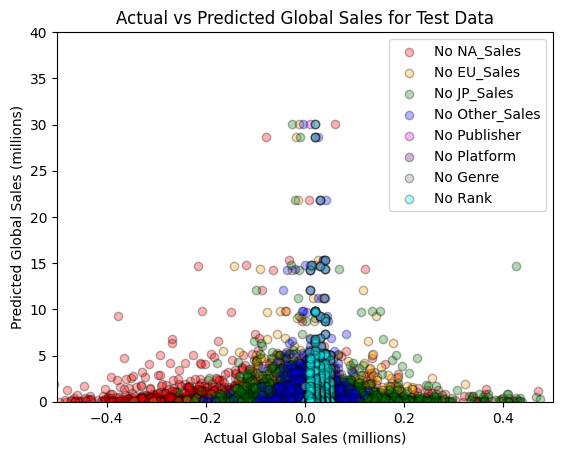

In [33]:
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df = clean_data(vgsales_df)
vgsales_df.drop('Name', inplace=True, axis=1)
df_encoded, platform_encoder, publisher_encoder, genre_encoder = encoder(vgsales_df)
sales = df_encoded['Global_Sales']


df_encoded.drop('Global_Sales', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, sales, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predTrain = model.predict(X_train)
predTest_std = model.predict(X_test)

r2_train = r2_score(y_train, predTrain)
r2_test_std = r2_score(y_test, predTest_std)

pred_lst = [predTest_std, predNoNA, predNoEU, predNoJP, predNoOther,
            predNoPublisher, predNoPlatform, predNoGenre]
r2_lst = [r2_test_std, r2_testNoNA, r2_testNoEU, r2_testNoJP, r2_testNoOther,
                 r2_testNoPublisher, r2_testNoPlatform, r2_testNoGenre]

plt.scatter(predNoNA, predTest_std, alpha=0.3, color='red', edgecolors='black',
            label='No NA_Sales')
plt.scatter(predNoEU, predTest_std, alpha=0.3, color='orange', edgecolors='black',
            label='No EU_Sales')
plt.scatter(predNoJP, predTest_std, alpha=0.3, color='green', edgecolors='black',
            label='No JP_Sales')
plt.scatter(predNoOther, predTest_std, alpha=0.3, color='blue', edgecolors='black',
            label='No Other_Sales')
plt.scatter(predNoPublisher, predTest_std, alpha=0.3, color='magenta', edgecolors='black',
            label='No Publisher')
plt.scatter(predNoPlatform, predTest_std, alpha=0.3, color='purple', edgecolors='black',
            label='No Platform')
plt.scatter(predNoGenre, predTest_std, alpha=0.3, color='grey', edgecolors='black',
            label='No Genre')
plt.scatter(predNoRank, predTest_std, alpha=0.3, color='cyan', edgecolors='black',
            label='No Rank')

plt.xlabel("Actual Global Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("Actual vs Predicted Global Sales for Test Data")

plt.legend()

plt.xlim(-0.5, 0.5)
plt.ylim(0, 40)

plt.show()

After evaluating the Linear Regression model by utilizing the R^2 score when a single feature is removed, we see that the sales data is very important for the model to make a prediction. When we lose categorical data, there is little to no change in how much variance is explained by the model. However, when we lose any data related to regional sales, the R^2 score becomes very invalid, exceeding the threshold of -1.


To learn more about Linear Regression and OneHot encoding (and even other encoders), check out these links!

[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[OneHot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)



### K-Means Clustering (Part 1)

Now, let's shift our focus to video game publishers. We have a lot of information about the games they make and the sales that these games make, so could we use this data to identify which publishers are generally more successful and which aren't?

To answer this question, we'll use a K-Means clustering algorithm, which identifies distinct patterns in our data to group points into *k* clusters.

To begin, let's do some feature engineering! For this tutorial, we will define a 'hit' game as being in the top 40% across all of North American, European, Japanese, and 'Other' sales. So, we'll use these criteria to label each game's performance:

First compute the sales thresholds using quantiles.
* Top 40% of global sales = hit (60% Quartile)
* Bottom 25% of global sales = flop (25% Quartile)

Define a function that assigns each game a label (hit, flop, or middle) based on its Global_Sales. Apply this function to all rows and store the result in a new column called performance_label.

In [50]:
# reloading original data
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df = vgsales_df.dropna(subset=['Year']) # dropping NA values in the `Year` column
vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna('Unknown') # putting in placeholder values for unknown publishers

In [51]:
# thresholds (top 40% = hit, bottom 25% = flop)
q40 = vgsales_df["Global_Sales"].quantile(0.60)  # top 40%
q25 = vgsales_df["Global_Sales"].quantile(0.25)  # bottom 25%

def label_game(sales):
    if sales >= q40:
        return "hit"
    elif sales <= q25:
        return "flop"
    else:
        return "middle"

vgsales_df["performance_label"] = vgsales_df["Global_Sales"].apply(label_game)

Let's get a more holistic view of the global sales and number of hit/flop games for each publisher:

In [52]:
# group the data by publisher
grouped = vgsales_df.groupby("Publisher")

# aggregate functions to compute stats about each publisher's global sales
pub_stats = grouped["Global_Sales"].agg(
    num_games="count",
    mean_global="mean",
    median_global="median",
    std_global="std"
).reset_index()

# get the total number of hit and flop games for each publisher
hit_counts = grouped.apply(lambda g: (g["performance_label"] == "hit").sum())
flop_counts = grouped.apply(lambda g: (g["performance_label"] == "flop").sum())

pub_stats["num_hits"] = hit_counts.values
pub_stats["num_flops"] = flop_counts.values

# get ratios of hits and flops to total number of games
pub_stats["hit_rate"] = pub_stats["num_hits"] / pub_stats["num_games"]
pub_stats["flop_rate"] = pub_stats["num_flops"] / pub_stats["num_games"]

# get ratios of hits to flops for each publisher
eps = 1e-6 # prevent division by 0
pub_stats["hit_to_flop_ratio"] = (pub_stats["hit_rate"] + eps) / (pub_stats["flop_rate"] + eps)

pub_stats["std_global"] = pub_stats["std_global"].fillna(0)

As we saw earlier in the exploration and visualization sections, some publishers in the dataset only have a few games, which makes it hard to really get any information about whether they have consistent hit games or flop games. So, we'll filter out publishers that have less than 10 games in the dataset.

In [53]:
# filtering out publishers with less than 10 total games in the dataset
min_games = 10
pub_stats_filtered = pub_stats[pub_stats["num_games"] >= min_games].copy()

We'll need to select the features that we'll use for training the K-Means model and prepare the data by scaling it.

In [54]:
# select features for clustering
feature_cols = [
    "hit_rate",
    "flop_rate",
    "mean_global",
    "median_global",
    "std_global",
    "hit_to_flop_ratio"
]

X = pub_stats_filtered[feature_cols].values

# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, we've prepared all the data that we need to answer our question. But we have one more problem to solve, how many clusters should we make? We need to be careful with the number of clusters that we make since we might run into problems with overfitting or underfitting!

To find the right number of clusters, we'll use a technique called the elbow method, where we try different values for the *k* hyperparameter and see which one is the "elbow" point which is the point where adding more clusters doesn't benefit us.

HINT! Use KELBOW_SCOREMAP from the elbow_module using the mean_distortion_score.

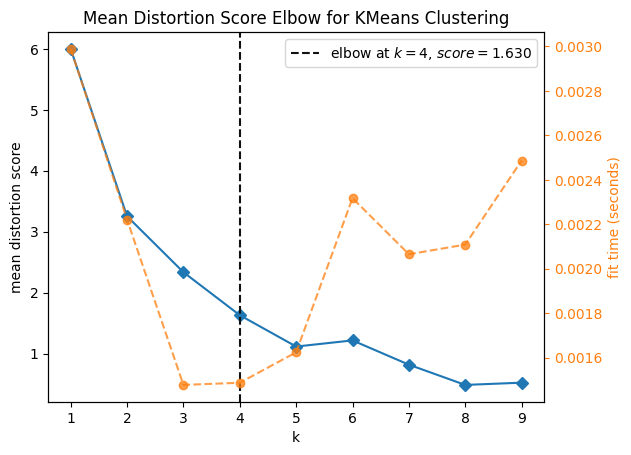

<Axes: title={'center': 'Mean Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='mean distortion score'>

In [66]:
# elbow method for determining best k
def mean_distortion_score(X, labels, metric="euclidean"):
    total_distortion = distortion_score(X, labels, metric)
    return total_distortion / X.shape[0]

elbow_module.KELBOW_SCOREMAP['distortion'] = mean_distortion_score

# load the data
X_yellowbrick = X_scaled

K = range(1, 10) # range of k-values to try out
model = KMeans()
vis = KElbowVisualizer(model, k = K)
vis.fit(X_yellowbrick).show() # graph to visualize where the elbow point is


Based on the plot above, it seems like k=4 is the best number of clusters to form with this data.

Finally, let's train the model and check out the resulting clusters!

In [67]:
# based on above plots it seems like k = 4 is the best number of clusters
km_labels = KMeans(n_clusters=4).fit_predict(X_scaled)

# feature distribution per cluster (using original non-scaled data)
km_df = pd.DataFrame(X, columns=feature_cols)
km_df['km_predict'] = km_labels

descriptions = km_df.groupby('km_predict')

for id, group in descriptions:
  print(f'Description of features for group {id}:')
  display(group.describe())

Description of features for group 0:


,hit_rate,flop_rate,mean_global,median_global,std_global,hit_to_flop_ratio,km_predict
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,0.302543,0.263130,0.260578,0.144538,0.347103,19849.453904,0.0
std,0.112125,0.119851,0.108980,0.051126,0.218762,91094.366272,0.0
min,0.045455,0.000000,0.108667,0.065000,0.068099,0.200004,0.0
25%,0.211111,0.180828,0.184286,0.100000,0.220684,0.600001,0.0
50%,0.285714,0.294118,0.230833,0.140000,0.272636,1.000000,0.0
75%,0.400000,0.342857,0.292500,0.180000,0.429025,2.032253,0.0
max,0.529494,0.500000,0.560667,0.270000,1.004525,461539.461538,0.0


Description of features for group 1:


,hit_rate,flop_rate,mean_global,median_global,std_global,hit_to_flop_ratio,km_predict
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0
mean,0.658552,0.093212,0.997061,0.462500,1.615402,10.267215,1.0
std,0.088466,0.047271,0.468518,0.180573,1.201961,9.331795,0.0
min,0.483871,0.019231,0.554953,0.230000,0.559520,2.499992,1.0
25%,0.602447,0.061852,0.736996,0.335000,1.071123,4.907704,1.0
50%,0.662773,0.086421,0.920845,0.430000,1.219354,7.989594,1.0
75%,0.712717,0.113584,1.112657,0.530000,1.668482,10.999843,1.0
max,0.807692,0.193548,2.563836,0.920000,5.676925,41.997868,1.0


Description of features for group 2:


,hit_rate,flop_rate,mean_global,median_global,std_global,hit_to_flop_ratio,km_predict
count,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0
mean,0.815079,0.0,1.029532,0.681667,0.963300,815080.365079,2.0
std,0.146275,0.0,0.528430,0.322581,0.628577,146275.245574,0.0
min,0.650000,0.0,0.544500,0.355000,0.520824,650001.000000,2.0
25%,0.758333,0.0,0.747964,0.522500,0.603547,758334.333333,2.0
50%,0.866667,0.0,0.951429,0.690000,0.686270,866667.666667,2.0
75%,0.897619,0.0,1.272048,0.845000,1.184538,897620.047619,2.0
max,0.928571,0.0,1.592667,1.000000,1.682806,928572.428571,2.0


Description of features for group 3:


,hit_rate,flop_rate,mean_global,median_global,std_global,hit_to_flop_ratio,km_predict
count,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01,68.0
mean,0.065532,0.640188,0.083866,0.048897,0.102364,1.186351e-01,3.0
std,0.063894,0.171292,0.037865,0.018864,0.077496,1.177128e-01,0.0
min,0.000000,0.307692,0.015714,0.010000,0.007559,9.999990e-07,3.0
25%,0.000000,0.509016,0.056663,0.030000,0.045347,1.585414e-06,3.0
50%,0.061111,0.615385,0.080568,0.050000,0.082974,9.091070e-02,3.0
75%,0.103239,0.756944,0.110336,0.060000,0.130114,2.222239e-01,3.0
max,0.230769,1.000000,0.164286,0.080000,0.355395,3.750010e-01,3.0


Taking a quick look at the feature distributions for each cluster, we can start to see some defining characteristics that separate each group and interpret them to answer our questions:

- **Cluster 0** has a high average hit-to-flop ratio, but a high standard deviation too (mix of publishers making a moderate number of hit games & high number of hit games- most likely represents outliers)
- **Cluster 1** has a moderate hit-to-flop ratio (making slightly more games that are hits than flops)
- **Cluster 2** has a very high hit-to-flop ratio, but a lot of data points in it have much higher hit-to-flop ratios than the data points in cluster 0 (consistently making games that are hits)
- **Cluster 3** seems to have a small hit-to-flop ratio (making slightly more games that are flops)


To get a better picture of how these clusters differ in their feature distributions, let's make boxplots showing the spread of each feature across the 4 clusters!

* Plot a boxplot for each feature grouped by cluster to compare distributions.
1. hit_rate
2. flop_rate
3. mean_global
4. median_global
5. std_global
6. hit_to_flop_ratio (apply log_scale for better readability!)

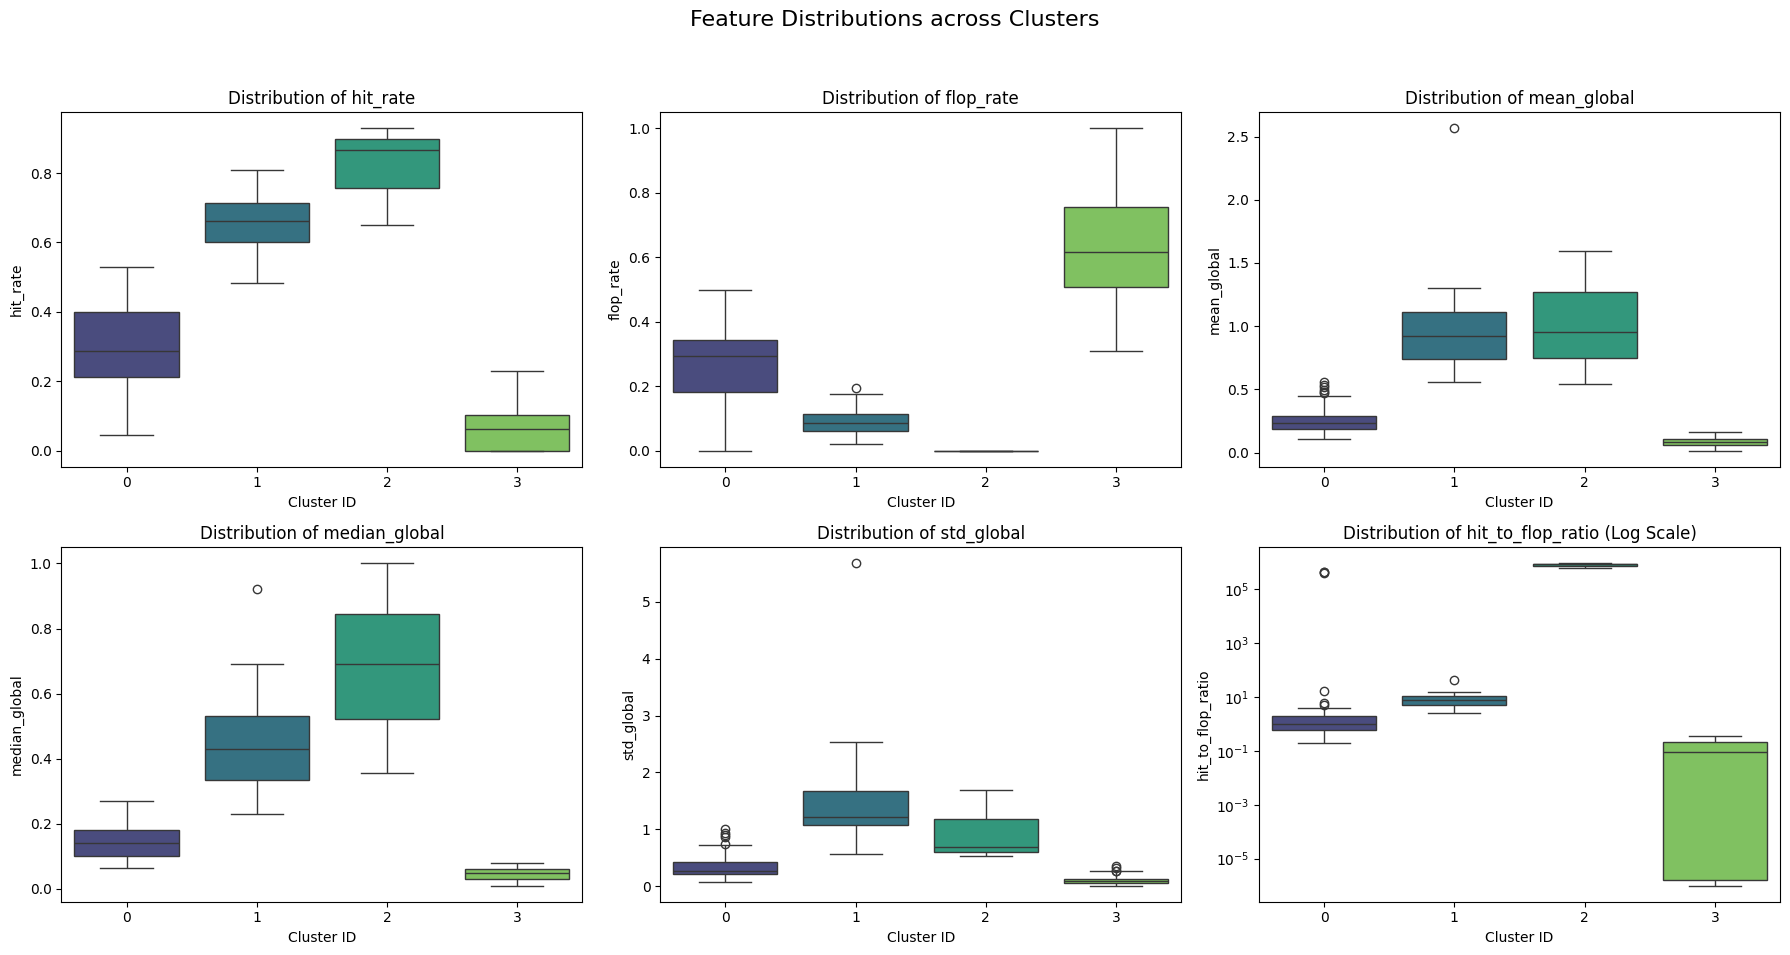

In [68]:
# attach the cluster labels to the filtered dataframe
pub_stats_filtered['cluster'] = km_labels

# labels for legend
cluster_map = {
    0: 'Cluster 0 (Mixed Hit/Flop Rates)',
    1: 'Cluster 1 (Moderate Hit Rate)',
    2: 'Cluster 2 (High Hit Rate)',
    3: 'Cluster 3 (High Flop Rate)'
}
pub_stats_filtered['cluster_name'] = pub_stats_filtered['cluster'].map(cluster_map)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Distributions across Clusters', fontsize=16)

# list of features to visualize
features_to_plot = [
    "hit_rate", "flop_rate",
    "mean_global", "median_global",
    "std_global", "hit_to_flop_ratio"
]

# flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    sns.boxplot(x='cluster', y=col, data=pub_stats_filtered, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Cluster ID')
    axes[i].set_ylabel(col)

    # log scale for readability
    if col == "hit_to_flop_ratio":
        axes[i].set_yscale('log')
        axes[i].set_title(f'Distribution of {col} (Log Scale)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Let's take a look at how the clusters differ in their hit rates versus their mean global sales:

Use a scatterplot where each point represents a publisher, plotting hit_rate on the x-axis and mean_global on the y-axis

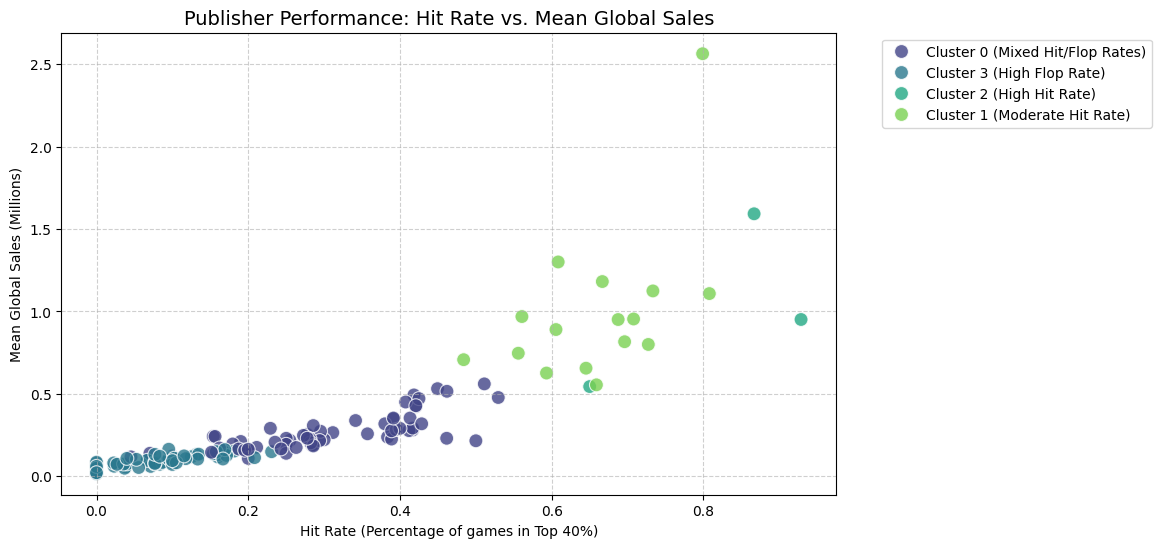

In [69]:
# plotting hit rate against mean global sales by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pub_stats_filtered,
    x="hit_rate",
    y="mean_global",
    hue="cluster_name",
    palette="viridis",
    s=100,
    alpha=0.8
)

plt.title("Publisher Performance: Hit Rate vs. Mean Global Sales", fontsize=14)
plt.xlabel("Hit Rate (Percentage of games in Top 40%)")
plt.ylabel("Mean Global Sales (Millions)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We can also use PCA (principal component analysis) to reduce the data to three components outlining the most distinct information from our clusters based on their features. Then, we can visualize the clusters in 3D space:

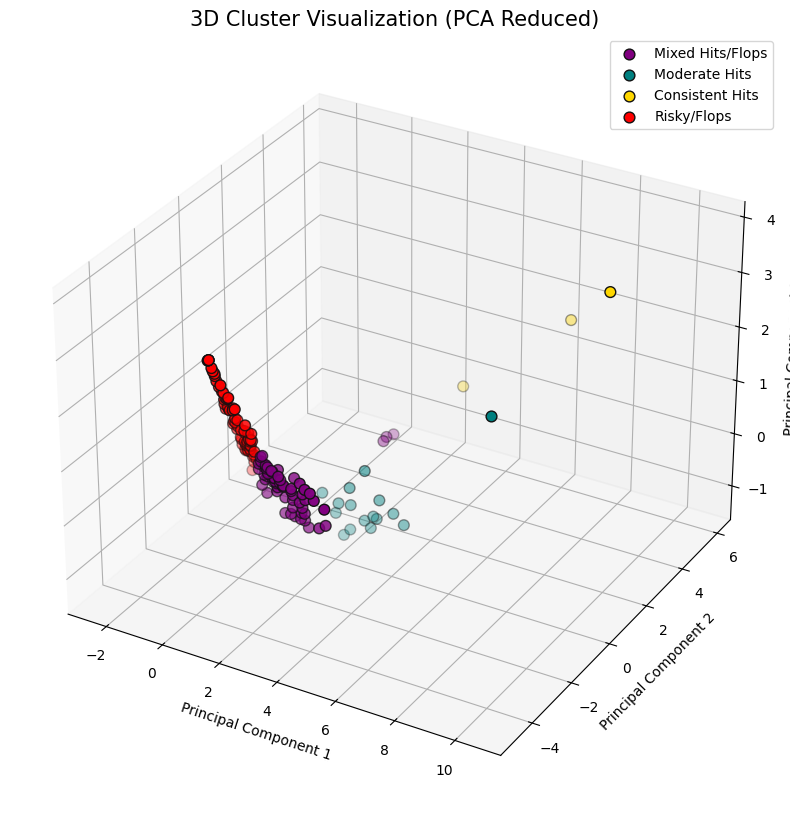

In [70]:
# reduce dimensions to 3 components
pca_3d = PCA(n_components=3)
X_pca = pca_3d.fit_transform(X_scaled)

# create the DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster'] = km_labels

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {0: 'purple', 1: 'teal', 2: 'gold', 3: 'red'}
labels = {0: 'Mixed Hits/Flops', 1: 'Moderate Hits', 2: 'Consistent Hits', 3: 'Risky/Flops'}

for cluster_id in sorted(df_pca['cluster'].unique()):
    subset = df_pca[df_pca['cluster'] == cluster_id]
    ax.scatter(
        subset['PC1'],
        subset['PC2'],
        subset['PC3'],
        c=colors[cluster_id],
        label=labels[cluster_id],
        s=60,
        edgecolor='k'
    )

ax.set_title('3D Cluster Visualization (PCA Reduced)', fontsize=15)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

Lastly, let's get the names of the publishers from these clusters:

In [71]:
# explicitly identify which publishers were hits and which ones were flops

categorized_publishers = pub_stats_filtered[['Publisher', 'cluster', 'cluster_name']].sort_values(
    by='cluster'
)

print(f"Total number of categorized publishers: {len(categorized_publishers)}")
display(categorized_publishers)

Total number of categorized publishers: 152


,Publisher,cluster,cluster_name
4,3DO,0,Cluster 0 (Mixed Hit/Flop Rates)
6,505 Games,0,Cluster 0 (Mixed Hit/Flop Rates)
17,Acclaim Entertainment,0,Cluster 0 (Mixed Hit/Flop Rates)
23,Activision Value,0,Cluster 0 (Mixed Hit/Flop Rates)
53,Atari,0,Cluster 0 (Mixed Hit/Flop Rates)
...,...,...,...
501,Telltale Games,3,Cluster 3 (High Flop Rate)
553,XS Games,3,Cluster 3 (High Flop Rate)
560,Yeti,3,Cluster 3 (High Flop Rate)
564,Zoo Digital Publishing,3,Cluster 3 (High Flop Rate)


### K-Means Clustering (Part 2)

Let's revisit K-means clustering with another question:

**"Given a platform and a year, what genre would succeed?"**

In other words, can we group specific video game launch environments (a console in a certain year) based on the types of games that sell well and figure out which single genre is a best seller in each group?

We want to find out what kind of game will likely succeed if you plan to launch it on a specific platform in a specific year.

K-means clustering is helpful here because it can group similar launch environments (platform and year combinations) based on the sales performance of different video game genres. This grouping allows researchers to identify latent segments or "clusters" where certain genres consistently outperform others, thereby answering the question by predicting the best genre for any new, similar environment that falls into that specific cluster.

First, let's use the **Elbow Method** to find the optimal k value for the amount of clusters to create. To do this, we would clean up our dataset of null and missing values and standardize it. Afterwards, we compute the mean distortion which is the average squared distance to centroids. Finally, we use Yellowbrick KElbowVisualizer to view our optimal K value.

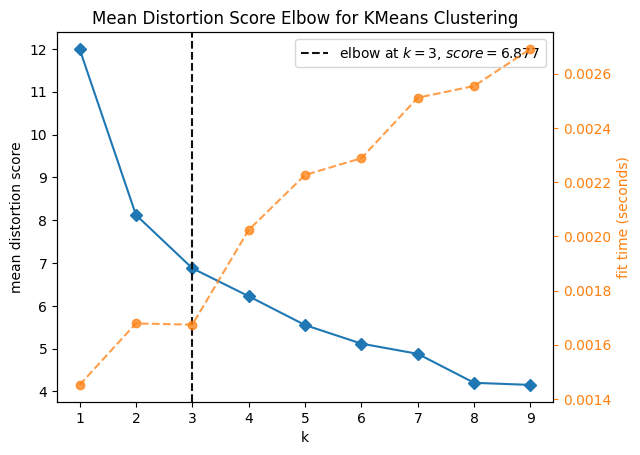

<Axes: title={'center': 'Mean Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='mean distortion score'>

In [47]:
# cleaning dataset
df_clean = vgsales_df.dropna(subset=['Platform', 'Year', 'Genre', 'Global_Sales'])

# groups the raw data to sum the global_sales for every unique platform + year + genre combination
genre_sales = df_clean.groupby(['Platform', 'Year', 'Genre'])['Global_Sales'].sum().reset_index()

# creates the feature matrix (X) needed for clustering
""" index: defines rows of the new data table where each unique combination of a platform + year becomes a single data point
    that K-means algorithm will group
    columns: indicates the genre for each platform + year combination
    values: measures performance of each genre in global sales
    """
sales_pivot = genre_sales.pivot_table(

    index=['Platform', 'Year'],
    columns='Genre',
    values='Global_Sales'
).fillna(0)

X = sales_pivot.values

# standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# elbow method for finding optimal K value

def mean_distortion_score(X, labels, metric="euclidean"):
    """Compute the mean distortion (average squared distance to centroids)"""
    total_distortion = distortion_score(X, labels, metric)

    return total_distortion / X.shape[0]

elbow_module.KELBOW_SCOREMAP['distortion'] = mean_distortion_score


# Yellowbrick KElbowVisualizer Implementation

# tests k values from 1-10
X_yellowbrick = X_scaled
K = range(1, 10)

model = KMeans(random_state=42, n_init='auto')

vis = KElbowVisualizer(
    model,
    k=K,
    metric='distortion',
    timing=False
)

# displays mean distortion score vs number of clusters (k)
vis.fit(X_yellowbrick)
vis.show()

Using the Elbow Method, we see that having **3 clusters** is optimal in terms of grouping our years and platforms due to our mean distortion score stabilizing at that point. Now we can apply K-means clustering. Let's also check out the description of features (mean, standard deviation, min, max, quartiles) for all genre sales columns within that specific cluster.

In [48]:
# applying kmeans clustering with k value of 3

k_value = 3

# runs K-means algorithm and returns the cluster label (0, 1, or 2) assigned to each platform-year observation
km_labels = KMeans(n_clusters=k_value, random_state=42, n_init='auto').fit_predict(X_scaled)

km_df = sales_pivot.copy()

# new column defining cluster label for each platform-year combination
km_df['km_predict'] = km_labels

# groups data by assigned cluster group label
descriptions = km_df.groupby('km_predict')

# prints mean, standard deviation, min, max, quartiles for all genre sales columns within each cluster
for id, group in descriptions:
  print(f'Description of features for Cluster {id}:')

  print(f'Cluster Size: {len(group)}')
  display(group.describe())

Description of features for Cluster 0:
Cluster Size: 202


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,km_predict
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0
mean,3.052525,0.507525,0.954109,1.201683,2.464158,0.466287,1.356188,2.438861,1.977030,0.738911,2.022376,0.549554,0.0
std,4.200053,1.153154,1.887204,2.623374,5.146214,1.150577,2.686940,4.967210,4.345274,1.559920,3.043697,1.094848,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.045000,0.050000,0.010000,0.060000,0.210000,0.000000,0.020000,0.240000,0.050000,0.020000,0.505000,0.000000,0.0
75%,4.415000,0.545000,1.032500,1.457500,2.435000,0.407500,1.467500,2.957500,1.920000,0.715000,2.872500,0.682500,0.0
max,17.120000,11.180000,10.850000,24.930000,43.170000,10.030000,14.550000,31.640000,31.100000,10.320000,13.640000,8.320000,0.0


Description of features for Cluster 1:
Cluster Size: 32


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,km_predict
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,31.310625,2.700312,7.642500,13.243437,7.776563,0.986250,13.04375,9.818125,19.306250,3.516875,27.011875,1.590625,1.0
std,12.403804,1.953501,5.756188,11.195863,8.243997,1.468376,10.79730,5.952735,13.271043,3.744940,18.236771,1.766453,0.0
min,8.350000,0.020000,0.160000,0.530000,0.000000,0.000000,1.52000,1.090000,0.320000,0.000000,10.550000,0.000000,1.0
25%,20.127500,1.145000,3.752500,6.257500,1.215000,0.000000,5.48250,5.215000,6.990000,0.767500,15.422500,0.627500,1.0
50%,32.685000,2.080000,6.390000,9.815000,4.680000,0.250000,8.99000,10.255000,20.240000,2.490000,20.155000,1.220000,1.0
75%,42.765000,4.172500,10.430000,15.270000,12.772500,1.285000,19.63250,13.000000,28.985000,4.727500,32.855000,1.805000,1.0
max,54.440000,6.490000,25.850000,46.200000,31.880000,5.050000,41.56000,23.560000,45.810000,14.830000,88.170000,9.450000,1.0


Description of features for Cluster 2:
Cluster Size: 7


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,km_predict
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,14.904286,6.552857,0.965714,18.727143,11.791429,16.638571,5.060000,16.715714,1.291429,18.337143,5.191429,1.645714,2.0
std,11.979475,5.452011,0.661862,10.871753,12.568496,10.866699,8.548998,10.688888,0.571968,14.240028,4.034805,1.084756,0.0
min,0.000000,0.000000,0.000000,1.280000,1.820000,5.320000,0.000000,1.100000,0.210000,0.000000,0.870000,0.000000,2.0
25%,6.345000,2.595000,0.605000,12.605000,4.930000,9.255000,1.545000,9.275000,1.130000,9.185000,2.810000,0.970000,2.0
50%,14.720000,6.880000,0.900000,17.380000,7.280000,15.340000,1.990000,19.310000,1.380000,13.570000,4.510000,1.660000,2.0
75%,22.050000,9.130000,1.295000,28.310000,12.895000,19.880000,3.020000,24.940000,1.575000,27.885000,6.025000,2.545000,2.0
max,32.820000,15.540000,2.060000,30.600000,37.790000,37.540000,24.300000,28.170000,2.040000,40.650000,13.290000,2.830000,2.0


This table is not easy to interpret! Let's create bar graphs to visualize each cluster's results while neglecting the 'Misc' genre as that is not being evaluated in our research question.


Each separate bar chart for each cluster shows mean performance by genre. First, we start by removing the Misc genre from the data, then sorting genres by performance within each cluster to make comparisons clearer and easier to interpret.

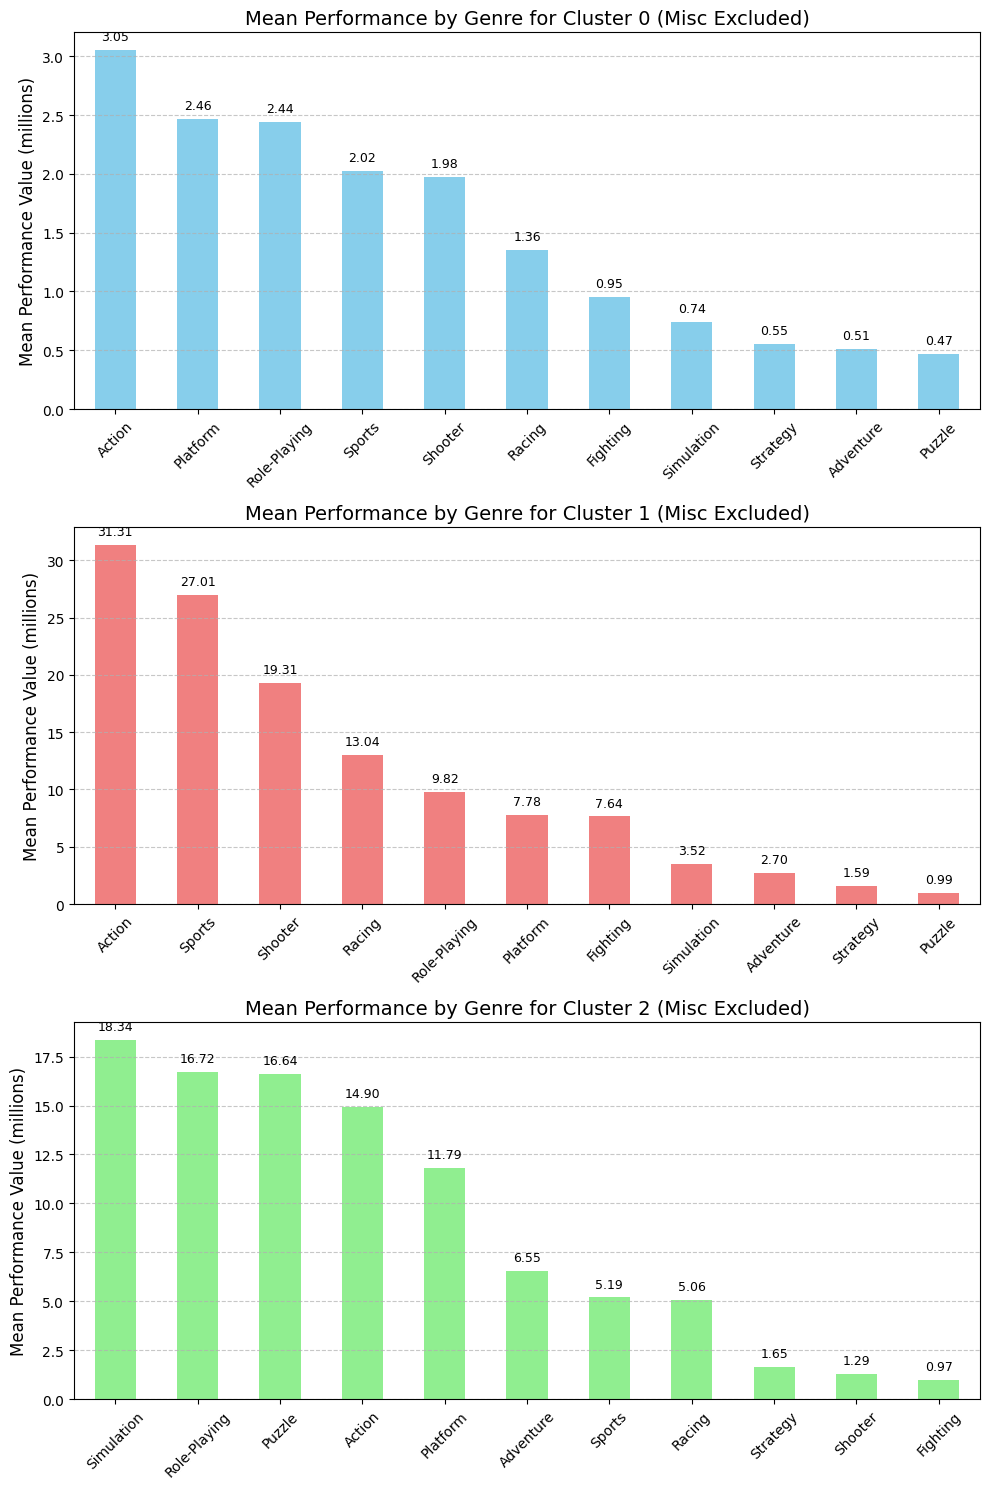

In [49]:
# plotting each cluster while aiming to exclude 'Misc' genre
genres = ['Action', 'Adventure', 'Fighting', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

# original 12-element mean performance lists (for reference, 'Misc' is at index 3)
cluster_0_original = [3.052525, 0.507525, 0.954109, 1.201683, 2.464158, 0.466287, 1.356188,
                      2.438861, 1.977030, 0.738911, 2.022376, 0.549554]
cluster_1_original = [31.310625, 2.700312, 7.642500, 13.243437, 7.776563, 0.986250, 13.04375,
                      9.818125, 19.306250, 3.516875, 27.011875, 1.590625]
cluster_2_original = [14.904286, 6.552857, 0.965714, 18.727143, 11.791429, 16.638571, 5.060000,
                      16.715714, 1.291429, 18.337143, 5.191429, 1.645714]

# create the corrected 11-element mean lists by excluding the value at index 3 ('Misc')
# uses list slicing to correctly omit the 4th element: [first 3 elements] + [elements from index 4 onwards]
cluster_0_without_misc = cluster_0_original[:3] + cluster_0_original[4:]
cluster_1_without_misc = cluster_1_original[:3] + cluster_1_original[4:]
cluster_2_without_misc = cluster_2_original[:3] + cluster_2_original[4:]

cluster_data = {
    'Cluster 0': cluster_0_without_misc,
    'Cluster 1': cluster_1_without_misc,
    'Cluster 2': cluster_2_without_misc
}

df = pd.DataFrame(cluster_data, index=genres)

# plotting each cluster

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.6)

colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, (cluster_name, color) in enumerate(zip(df.columns, colors)):
    sorted_df = df[[cluster_name]].sort_values(by=cluster_name, ascending=False)

    ax = axes[i]
    sorted_df.plot(kind='bar', ax=ax, legend=False, color=color)

    ax.set_title(f'Mean Performance by Genre for {cluster_name} (Misc Excluded)', fontsize=14)
    ax.set_ylabel('Mean Performance Value (millions)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black',
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Summary of Results:**


---
The analysis of the K-Means clustering results reveals three **dominant genre sales profiles** for video game platform-year combinations...

The largest cluster, **Cluster 0 (Older Console Profile)**, containing 202 platform-year groups, is characterized by the lowest average sales across the board, suggesting these markets are generally smaller, older, or less popular. Within this low-revenue profile, the primary driver of success remains **Action** games (3.05 million units), followed by **Platform** titles (2.46 million units).

The second most profitable cluster is **Cluster 1 (Sports/Action Profile)**. It's defined by high average sales across all genres. In this highly competitive, high-revenue profile, success is driven by the broad-appeal titles of the **Action** genre (31.31 million units), which is closely supported by **Sports** games (27.01 million units).

Finally, the smallest but most distinct group is **Cluster 2 (Simulation/Roleplaying/Puzzle Profile)**, which consists of 7 high-performing platform-year combinations characterized by strong sales in less mainstream genres. The primary driver of success here is the **Simulation** genre (18.34 million units), which groups closely with **Role-Playing** (16.72 million units) and **Puzzle** (16.64 million units).

# **Insights and Conclusions**

Based on our machine learning techniques, we have gained some more knowledge to answer our primary questions:

1. **Linear Regression model**: Using the output results, we can justify that predicting the number of sales of a video game cannot always be accurately determined by features like company, genre, what platform the game is hosted on, or even the rank. There is likely additional context that determines the success of video games which cannot fully be captured in the data set or by Linear Regression.

- This is helpful to keep in mind when checking out new games- we can't always know how successful a game is going to be just based on who's publishing it or what year it's made in!

2. **K-Means model (part 1)**: By splitting the data into clusters, we stratified the levels of consistent success that various publishers have with releasing games.

- Information about comparative success rates might be useful information for investors or game designers who want to collaborate with a successful publisher when releasing new games.

- This information also provides good feedback for publishers to know where they stand in comparison to competitors.

3.  **K-Means model (part 2)**: We learned that one model can be quite versatile and used in different contexts to answer different questions! Clustering video game environments by console and year helped us to see what genres of games perform best on different console and during different time periods.

- Video game developers could use this information when designing games to learn about shifts in genre popularity and predict what kinds of games will be popular in the future on a particular console.

- This information might also help game designers with selecting the type of console they might want to make their game playable on to maximize their profit.

Through this tutorial, we learned about how useful data science, statistical analysis, and machine learning can be when discovering and analyzing trends across various forms of data. Whether we're working with categorical data or numbers, there are endless possibilities for extracting new information and using our data to the fullest potential. We can also appreciate how helpful visuals can be for understanding and validating potential correlations in our dataset: just a quick glance at a graph or chart can often give us helpful insights! Whether you're analyzing experiments for a research project or just interested in learning about the latest trends, data science always comes in handy!